Metrics binary lens systems like planets
new format


# Extract fit and true values

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
import os, sys
import re
from tqdm.auto import tqdm
from pyLIMA import telescopes
from pyLIMA.models import PSBL_model
from pyLIMA.models import USBL_model
from pyLIMA.models import FSPLarge_model
from pyLIMA.outputs import pyLIMA_plots
from pyLIMA import event
from tqdm.auto import tqdm
from astropy.time import Time
from astropy import constants as const
from astropy import units as u
from tqdm.auto import tqdm
import h5py
from astropy.table import QTable

import math
home = '/home/anibal/'
sys.path.append(home + '/roman_rubin/fit_codes')
# this codes are in the /fit_codes directory 
# https://github.com/anibal-art/roman_rubin/tree/main/fit_codes
# from fit_results import chi_dof, best_model, event_fits, sigmas
# from fit_results import 
# from filter_curves import read_curves
# from analysis_metrics import m1,m2,m3, fit_true, metrics, sigma_ratio, bias_ratio, fit_values
# from plot_models import plot_LCmodel
# from plot_lightcurves import model
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
# from plot_models import plot_only_model

import pandas as pd
import numpy as np
import math
import astropy.units as u
import astropy.constants as const
from tqdm.auto import tqdm

def event_fits(path_fits):
    '''
    return events in common with roman and rubin
    we have events that fits only one of two for unkown reasons
    '''
    
    files_fits = os.listdir(path_fits)
    
    files_roman = [f for f in files_fits if 'Roman' in f]
    files_rr = [f for f in files_fits if not 'Roman' in f]
    
    n_rom = [] # list with the event number
    for j in files_roman:
        number = int(re.findall(r'\d+', j)[0])
        n_rom.append(number)
    
    n_rr = [] # # list with the event number
    for j in files_rr:
        number = int(re.findall(r'\d+', j)[0])
        n_rr.append(number)
    
    # Convert lists to sets
    set1 = set(n_rom)
    set2 = set(n_rr)
    # Find the common elements using intersection
    common_elements = set1.intersection(set2)
    # Convert the result back to a list (if needed)
    common_elements_list = list(common_elements)
    return common_elements_list

In [2]:
path_ephemerides = '/home/anibal/files_db/james_webb.txt' #PATH TO EPHEMERIDES
path = '/home/anibal/results_roman_rubin/BH_final/BH/'
save_results = path+'results/'
path_model = ['set_sim'+str(i)+'/' for i in range(1,9)]
path_fit = ['set_fit'+str(i)+'/' for i in range(1,9)]
path_set_sim = [path+'set_sim'+str(i)+'/' for i in range(1,9)]
path_set_fit = [path+'set_fit'+str(i)+'/' for i in range(1,9)]

In [3]:
label = {'piEE':'\\pi_{EE}','piEN':'\\pi_{EN}','rho':'\\rho','t0':'t_0','te':'t_E','u0':'u_0','s':'s','q':'q','alpha':'\\alpha', 'piE':'\\pi_E'}
labels = {'t0':'t_0', 'u0':'u_0', 'te':'t_E','rho':'\\rho', 's':'s', 'q':'q', 'alpha':'\\alpha', 'piEE':'\pi_{EE}', 'piEN':'\pi_{EN}'}


In [4]:
filenames =[path+"set_fit2/"+f for f in os.listdir(path+"set_fit2") if "RR" in f]
nflux = []
pflux = []
for i in range(len(filenames)):
    try:
        fit_data = np.load(filenames[i],allow_pickle=True).item()
        fit_flux = fit_data["best_model"][9:len(fit_data["best_model"])]
        if any(np.array(fit_flux)<0):
            nflux.append(1)
        else:
            pflux.append(1)
    except: 
        pass
print(len(nflux))
print(len(pflux))


0
705


In [5]:
# np.load(path+'set_fit1/Event_Roman_126_TRF.npy',allow_pickle=True).item()['best_model']
print(np.load(path+'set_fit1/Event_Roman_126_TRF.npy',allow_pickle=True).item()['best_model'][3:5])
np.load(path+'set_fit1/Event_Roman_126_TRF.npy',allow_pickle=True).item()['covariance_matrix']

[0.0006490842475867709, 6.654129677540214e-05]


array([[ 1.75057485e+04,  6.87226431e+03, -2.05257972e+05,
         2.25212772e+02,  5.08859893e-01,  5.36850723e+06,
         9.83627524e+00],
       [ 6.87226450e+03,  1.00878381e+04, -2.91724164e+05,
         9.10398622e+01,  1.26329778e+01,  7.64325500e+06,
         1.30362444e+01],
       [-2.05257977e+05, -2.91724164e+05,  8.44050708e+06,
        -2.71758584e+03, -3.61052328e+02, -2.21135587e+08,
        -3.78575256e+02],
       [ 2.25212773e+02,  9.10398598e+01, -2.71758577e+03,
         2.90510345e+00,  9.15519090e-03,  7.10762668e+04,
         1.30371512e-01],
       [ 5.08860209e-01,  1.26329779e+01, -3.61052332e+02,
         9.15519496e-03,  3.75047703e-02,  9.49561914e+03,
         1.59181511e-02],
       [ 5.36850737e+06,  7.64325500e+06, -2.21135587e+08,
         7.10762686e+04,  9.49561905e+03,  5.79367550e+09,
         9.91368806e+03],
       [ 9.83627548e+00,  1.30362443e+01, -3.78575256e+02,
         1.30371515e-01,  1.59181509e-02,  9.91368805e+03,
         2.0379282

In [6]:

def new_rows(camino,st):
    data_rr = np.load(camino,allow_pickle=True).item()
    labels_params = ['t0','u0','te','piEN','piEE']
    fit_values = dict(zip(labels_params, 
                          data_rr['best_model'][0:5]))

    if any(np.diag(data_rr['covariance_matrix'])<0):
        fit_error = np.zeros(5)
    else:
        fit_error= np.sqrt(np.diag(data_rr['covariance_matrix']))[0:5]

    for j,key in enumerate(labels_params):
        fit_values[key+'_err']=fit_error[j]
    fit_values['Source'] = data_rr['true_params'].name+st*5000

    true_values = data_rr['true_params'][['t0','u0','te','piEN','piEE']].to_dict()#.values[0:9])
    true_values['Source']=data_rr['true_params'].name+st*5000

    new_row_true = pd.DataFrame([true_values])
    new_row_fit = pd.DataFrame([fit_values])
    return new_row_true, new_row_fit

def fit_true(path):
    cols_true = ['Source','t0','u0','te','piEN','piEE']
    cols_fit=cols_true+[t+'_err' for t in ['t0','u0','te','piEN','piEE']]

    true = pd.DataFrame(columns=cols_true)
    fit_rr = pd.DataFrame(columns=cols_fit)
    fit_roman = pd.DataFrame(columns=cols_fit)
    fit_completed = []
    for st in tqdm(range(1,5)):
        PATH = path+f'set_fit{st}/'
        # print(PATH)
        nevent = event_fits(PATH)
        # print(len(nevent))
        # print(len([f for f in os.listdir(path) if "RR" in f] ))
        # print(len([f for f in os.listdir(path) if "Roman" in f] ))
        list_files_rr = [f'Event_RR_{int(f)}_TRF.npy' for f in nevent]
        list_files_roman = [f'Event_Roman_{int(f)}_TRF.npy' for f in nevent]

        for i in range(len(nevent)):
            path_rr = PATH+list_files_rr[i]
            path_roman = PATH+list_files_roman[i]
            try:
            # if i==126:
                # print(path_rr)
                new_row_true, new_row_rr = new_rows(path_rr,st)
                new_row_true2, new_row_roman = new_rows(path_roman,st)
                # print(new_row_true)
                # print(any(new_row_true.values[0]==new_row_true2.values[0]))
                true = pd.concat([true, new_row_true], ignore_index=True)
                fit_rr = pd.concat([fit_rr, new_row_rr], ignore_index=True)
                fit_roman = pd.concat([fit_roman, new_row_roman], ignore_index=True)

                fit_completed.append(1)

            except:
                # print(i)
                fit_completed.append(0)
    return true, fit_rr, fit_roman

true, fit_rr, fit_roman = fit_true(path)

  0%|          | 0/4 [00:00<?, ?it/s]

/tmp/ipykernel_8578/259805451.py:51: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  true = pd.concat([true, new_row_true], ignore_index=True)
/tmp/ipykernel_8578/259805451.py:52: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fit_rr = pd.concat([fit_rr, new_row_rr], ignore_index=True)
/tmp/ipykernel_8578/259805451.py:53: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when de

In [7]:
true

,Source,t0,u0,te,piEN,piEE
0,5003,2.462398e+06,0.104792,194.921706,0.033302,0.019179
1,5017,2.462527e+06,0.712873,116.915102,0.002841,0.001381
2,5035,2.462730e+06,0.941390,60.811352,0.000986,-0.004419
3,5049,2.462581e+06,0.017302,224.210360,0.051175,0.021967
4,5052,2.461567e+06,0.334133,1307.198613,0.003846,-0.008434
...,...,...,...,...,...,...
2372,24961,2.462203e+06,0.633123,283.449748,0.000015,-0.005768
2373,24965,2.462361e+06,0.311312,143.758333,0.004695,0.003344
2374,24970,2.462951e+06,0.594641,32.519686,0.000617,-0.002216
2375,24990,2.462715e+06,0.031343,2434.191450,0.011737,0.007106


In [8]:
# try:
#     fit_rr = pd.read_csv(save_results+'fit_rr_ffp.csv')
#     fit_roman = pd.read_csv(save_results+'fit_roman_ffp.csv')
#     true = pd.read_csv(save_results+'true_ffp.csv')
# except:
#     fit_rr, fit_roman, true = fit_true(path)
#     fit_rr.to_csv(save_results+'fit_rr_ffp.csv', index=False)
#     fit_roman.to_csv(save_results+'fit_roman_ffp.csv', index=False)
#     true.to_csv(save_results+'true_ffp.csv', index=False)

In [9]:

def read_data(path_model):
    # Open the HDF5 file and load data using specified names
    with h5py.File(path_model, 'r') as file:
        # Load array with string with info of dataset using its name
        info_dataset = file['Data'][:]
        info_dataset = [file['Data'][:][0].decode('UTF-8'), file['Data'][:][1].decode('UTF-8'),
                        [file['Data'][:][2].decode('UTF-8'), [0, 0]]]
        # Dictionary using its name
        pyLIMA_parameters = {key: file['pyLIMA_parameters'].attrs[key] for key in file['pyLIMA_parameters'].attrs}
        # Load table using its name
        bands = {}
        for band in ("W149", "u", "g", "r", "i", "z", "y"):
            loaded_table = QTable()
            for col in file[band]:
                loaded_table[col] = file[band][col][:]
            bands[band] = loaded_table
        return info_dataset, pyLIMA_parameters, bands


def chichi(name_file):
    '''
    name_file(str):This function receives as input the name of the file
    example: /home/user/model/set_sim1/Event_RR_42_trf.npy.
    '''
    # print(name_file[name_file.index('Event_')-2])
    nset = int(name_file[name_file.index('Event_')-2:name_file.index('Event_')-1])

    # print(nset)
    name_set = 'set_sim'+str(nset)
    directory_simset = name_file[0:name_file.index('set')]+name_set+'/'
    # print()
    nevent = re.sub(r'\D', '', name_file[name_file.index('Event_'):-1])
    
    model_file = directory_simset+'Event_'+str(nevent)+'.h5'
    info_dataset, model_params, curves=read_data(name_file)
    # curves,model_params = read_curves(model_file)
    name_file_rr=name_file[0:name_file.index('set')]+f"/set_fit{nset}/Event_RR_{nevent}_TRF.npy"
    name_file_roman=name_file[0:name_file.index('set')]+f"/set_fit{nset}/Event_Roman_{nevent}_TRF.npy"
    data_rr = np.load(name_file_rr,allow_pickle=True)
    data_roman = np.load(name_file_roman,allow_pickle=True)
    # print(data_rr)
    try:
        chi_rr =data_rr.item()["chi2"] 
        chi_roman =data_roman.item()["chi2"]

        dof_rr = sum([len(curves[key]) for key in curves])-len([len(curves[key]) for key in curves if not len(curves[key])==0])*2-9
        dof_roman =len(curves['W149'])-2-9
        # print(model_params)
        # print(chi_roman/dof)
        return chi_rr/dof_rr, chi_roman/dof_roman
    except:
        return 0,0

name_file = path+'set_sim1/Event_298.h5'
info_dataset, pyLIMA_parameters, bands=read_data(name_file)
# print(bands.keys())
chichi(name_file)

(1.0007058683116836, 1.0011012577421483)

In [10]:
from tqdm.auto import tqdm

# try:
    # fit_rr["chi2"]
# except:
    # name_file = [f for f in os.listdir(path+"set_sim1/")]
    # print(path+"set_fit1/"+name_file[0])
    # print(chichi(path+"set_sim1/"+name_file[2]))

id_to_chi2_rr = {}
id_to_chi2_roman = {}

for i in tqdm(range(1,9)):
    common_elements_list = event_fits(path+f"set_fit{i}/")
    if not len(common_elements_list)==0:
        for j in range(len(common_elements_list)):
            name_file = f"Event_{common_elements_list[j]}.h5"
            chi2rr, chi2roman = chichi(path+f"set_sim{i}/"+name_file)
            # print(chi2rr, chi2roman)
            id_to_chi2_rr[int(common_elements_list[j]+i*5000)] =chi2rr
            id_to_chi2_roman[int(common_elements_list[j]+i*5000)] =chi2roman

fit_rr['chi2'] = fit_rr['Source'].map(id_to_chi2_rr)
fit_roman['chi2'] = fit_roman['Source'].map(id_to_chi2_roman)
# fit_rr.to_csv(save_results+'fit_rr_ffp.csv', index=False)
# fit_roman.to_csv(save_results+'fit_roman_ffp.csv', index=False)
# true.to_csv(save_results+'true_ffp.csv', index=False)

  0%|          | 0/8 [00:00<?, ?it/s]

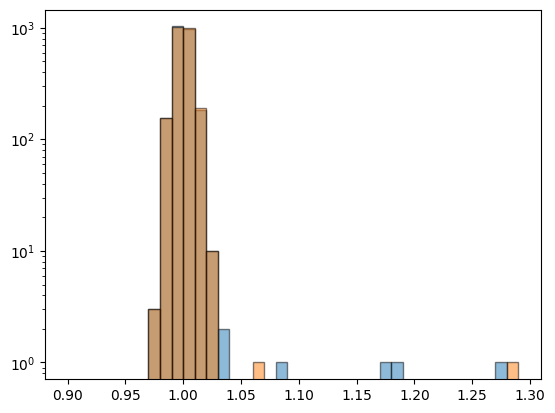

In [11]:
plt.hist(fit_rr['chi2'].values, bins=np.arange(0.9,1.3,0.01),alpha=0.5,edgecolor='k')
plt.hist(fit_roman['chi2'].values, bins=np.arange(0.9,1.3,0.01),alpha=0.5,edgecolor='k')
plt.yscale('log')

In [12]:
# !pip install seaborn

In [13]:

import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings

cov_piEE_piEN={}
# cov_rho_piEE={}
# cov_rho_piEN={}
cov_piEE_piEN_rom={}
# cov_rho_piEE_rom={}
# cov_rho_piEN_rom={}

for i in tqdm(range(len(fit_rr))):
    nsource = fit_rr["Source"].iloc[i]
    nset = int(nsource/5000)
    nevent = nsource-nset*5000
    
    data = np.load(path+f"set_fit{nset}/Event_RR_{nevent}_TRF.npy",allow_pickle=True)
    data_rom = np.load(path+f"set_fit{nset}/Event_Roman_{nevent}_TRF.npy",allow_pickle=True)
    
    best_model = data.item()['best_model']
    covariance_matrix = data.item()['covariance_matrix']
    cov_piEE_piEN[nsource]=covariance_matrix[3,4]
    # cov_rho_piEE[nsource]=covariance_matrix[3,7]
    # cov_rho_piEN[nsource]=covariance_matrix[3,8]
    
    best_model_rom = data_rom.item()['best_model']
    covariance_matrix_rom = data_rom.item()['covariance_matrix']
    cov_piEE_piEN_rom[nsource]=covariance_matrix_rom[3,4]
    # cov_rho_piEE_rom[nsource]=covariance_matrix_rom[3,7]
    # cov_rho_piEN_rom[nsource]=covariance_matrix_rom[3,8]
    
fit_rr["cov_piEE_piEN"]= fit_rr['Source'].map(cov_piEE_piEN)
# fit_rr["cov_rho_piEE"] = fit_rr['Source'].map(cov_rho_piEE)
# fit_rr["cov_rho_piEN"] = fit_rr['Source'].map(cov_rho_piEN)
fit_roman["cov_piEE_piEN"]= fit_rr['Source'].map(cov_piEE_piEN_rom)
# fit_roman["cov_rho_piEE"] = fit_rr['Source'].map(cov_rho_piEE_rom)
# fit_roman["cov_rho_piEN"] = fit_rr['Source'].map(cov_rho_piEN_rom)

  0%|          | 0/2377 [00:00<?, ?it/s]

In [14]:
for i in range(1,2):
    lista_sim1 = [int(''.join(re.findall(r'\d+', f))) for f in os.listdir(path+f'set_sim{i}') if 'txt' in f]
print(len(lista_sim1))

for i in range(1,2):
    lista_fit1 = [int(''.join(re.findall(r'\d+', f))) for f in os.listdir(path+f'set_fit{i}') if 'npy' in f]
print(len(lista_fit1))


set1 = set(lista_sim1)
set2 = set(lista_fit1)

# Find numbers that are unique to each list
unique_to_list1 = set1 - set2
unique_to_list2 = set2 - set1


0
3588


0 0 t0
0 1 u0
0 2 te
1 0 piEN
1 1 piEE


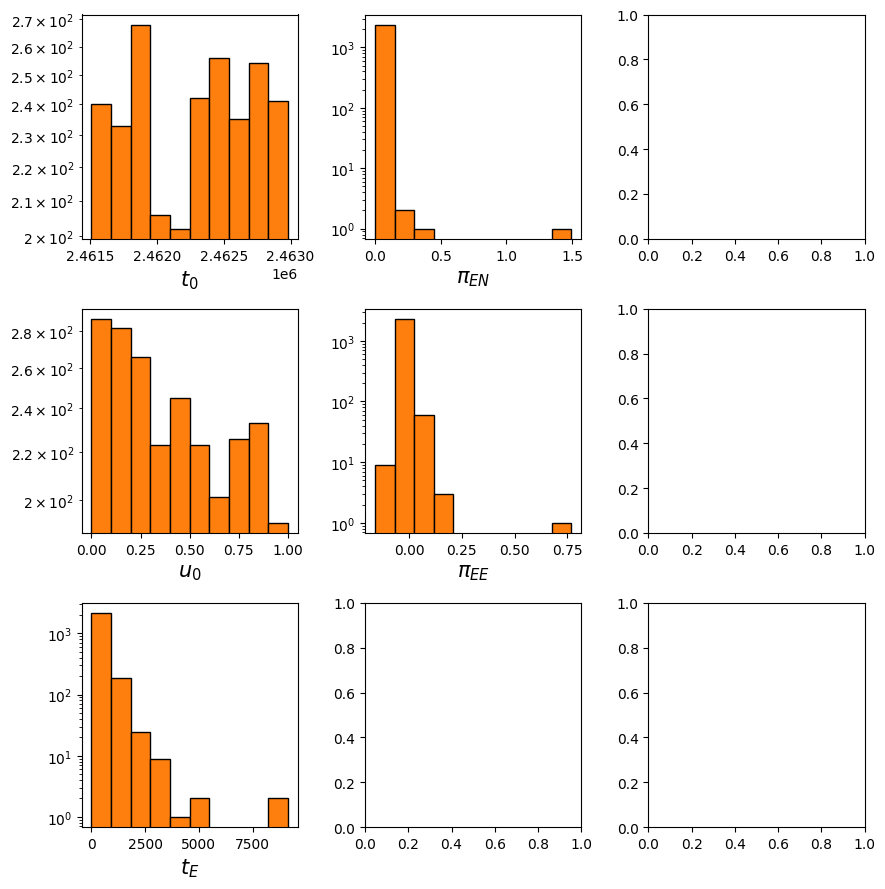

In [15]:
fig, axs = plt.subplots(3, 3, figsize=(9,9))
for i,p in enumerate(['t0', 'u0', 'te', 'piEN', 'piEE']):
    row, col = divmod(i, 3)
    
    print(row,col,p)
    axs[col,row].hist(true[p])
    axs[col,row].hist(true[p],edgecolor='black')
    axs[col,row].set_xlabel(f'${label[p]}$',fontsize=15)
    axs[col,row].set_yscale('log')
    # axs[col,row].set_xscale('log')
    if p == 'piE':
        axs[col,row].hist(np.sqrt(true['piEE']**2 + true['piEN']**2),edgecolor='black')
        axs[col,row].set_xlabel(f'${label[p]}$',fontsize=15)
        axs[col,row].set_yscale('log')

plt.tight_layout()
plt.show()

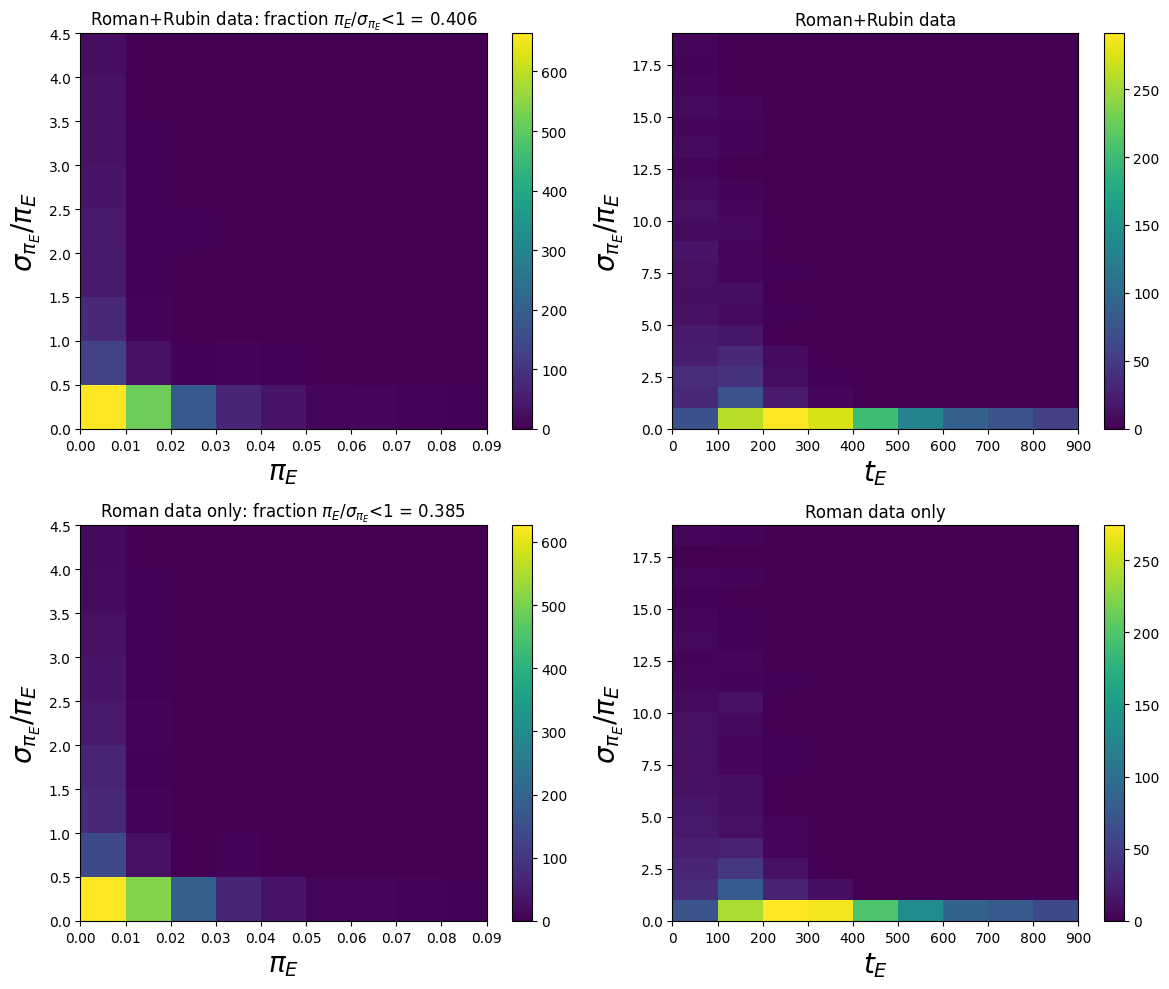

In [16]:
# Create a figure and a 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot for Roman+Rubin data - subplot (0, 0)

piE_rr = np.sqrt(fit_rr['piEN']**2 + fit_rr['piEE']**2)
sigma_piE_rr = (1/piE_rr) * np.sqrt((fit_rr['piEN']*fit_rr['piEN_err'])**2 + (fit_rr['piEE']*fit_rr['piEE_err'])**2)
f_rr = [f for f in sigma_piE_rr/piE_rr if f<0.1]
fraction_roman = len(f_rr)/len(sigma_piE_rr/piE_rr)
axs[0, 0].set_title('Roman+Rubin data: fraction $\pi_{E}/\sigma_{\pi_{E}}$<1 = '+str(round(fraction_roman,3)))
h = axs[0, 0].hist2d(piE_rr, sigma_piE_rr/piE_rr, bins=(np.arange(0, 0.1, 0.01), np.arange(0, 5, 0.5)))
axs[0, 0].set_xlabel(r'$\pi_{E}$', fontsize=20)
axs[0, 0].set_ylabel(r'$\sigma_{\pi_{E}}/\pi_{E}$', fontsize=20)
plt.colorbar(h[3], ax=axs[0,0])  # Add color bar to the subplot


# Plot for Roman+Rubin data - subplot (0, 1)
axs[0, 1].set_title('Roman+Rubin data')
# piE_rr = np.sqrt(fit_rr['piEN']**2 + fit_rr['piEE']**2)
sigma_piE_rr = (1/piE_rr) * np.sqrt((fit_rr['piEN']*fit_rr['piEN_err'])**2 + (fit_rr['piEE']*fit_rr['piEE_err'])**2)
h=axs[0, 1].hist2d(fit_rr['te'], sigma_piE_rr/piE_rr, bins=(np.arange(0, 1000, 100), np.arange(0, 20, 1)))
axs[0, 1].set_ylabel(r'$\sigma_{\pi_{E}}/\pi_{E}$', fontsize=20)
axs[0, 1].set_xlabel(r'$t_{E}$', fontsize=20)
plt.colorbar(h[3], ax=axs[0,1])  # Add color bar to the subplot
# Plot for Roman data only - subplot (1, 0)

piE_roman = np.sqrt(fit_roman['piEN']**2 + fit_roman['piEE']**2)
sigma_piE_roman = (1/piE_roman) * np.sqrt((fit_roman['piEN']*fit_roman['piEN_err'])**2 + (fit_roman['piEE']*fit_roman['piEE_err'])**2)
sigma_piE_roman = (1/piE_roman) * np.sqrt((fit_roman['piEN']*fit_roman['piEN_err'])**2 + (fit_roman['piEE']*fit_roman['piEE_err'])**2)
f_roman = [f for f in sigma_piE_roman/piE_roman if f<0.1]
fraction_roman = len(f_roman)/len(sigma_piE_roman/piE_roman)
axs[1, 0].set_title('Roman data only: fraction $\pi_{E}/\sigma_{\pi_{E}}$<1 = '+str(round(fraction_roman,3)))
h=axs[1, 0].hist2d(piE_roman, sigma_piE_roman/piE_roman, bins=(np.arange(0, 0.1, 0.01), np.arange(0, 5, 0.5)))
axs[1, 0].set_xlabel(r'$\pi_{E}$', fontsize=20)
axs[1, 0].set_ylabel(r'$\sigma_{\pi_{E}}/\pi_{E}$', fontsize=20)
plt.colorbar(h[3], ax=axs[1,0])  # Add color bar to the subplot
# Plot for Roman data only - subplot (1, 1)

# piE_roman = np.sqrt(fit_roman['piEN']**2 + fit_roman['piEE']**2)
axs[1, 1].set_title('Roman data only')
h=axs[1, 1].hist2d(fit_roman['te'], sigma_piE_roman/piE_roman, bins=(np.arange(0, 1000, 100), np.arange(0, 20, 1)))
axs[1, 1].set_ylabel(r'$\sigma_{\pi_{E}}/\pi_{E}$', fontsize=20)
axs[1, 1].set_xlabel(r'$t_{E}$', fontsize=20)
plt.colorbar(h[3], ax=axs[1,1])  # Add color bar to the subplot
# axs[1, 1].set_colorbar()
# Adjust layout to prevent clipping of titles
plt.tight_layout()
# Show the plot
plt.show()


# Veamos las metricas

In [17]:
# save_results = '/home/anibal/results_roman_rubin/FFP_v5/FFP/results/'
met_1_rr = pd.DataFrame(columns = true.columns)
met_1_roman= pd.DataFrame(columns = true.columns)
met_2_rr = pd.DataFrame(columns = true.columns)
met_2_roman= pd.DataFrame(columns = true.columns)
met_3_rr = pd.DataFrame(columns = true.columns)
met_3_roman= pd.DataFrame(columns = true.columns)
err_ratio= pd.DataFrame(columns = true.columns)
residuals_ratio= pd.DataFrame(columns = true.columns)
err_ratio['Source']=true['Source']
residuals_ratio['Source']=true['Source']

met_1_roman['Source']=true['Source']
met_1_rr['Source']=true['Source']
met_2_roman['Source']=true['Source']
met_2_rr['Source']=true['Source']
met_3_roman['Source']=true['Source']
met_3_rr['Source']=true['Source']
keys = ['t0',
'u0',
'te',
'piEN',
'piEE']
for key in keys:
    met_1_rr[key] = abs(true[key]-fit_rr[key])/true[key]
    met_1_roman[key] = abs(true[key]-fit_roman[key])/true[key]
    met_2_rr[key] = abs(true[key]-fit_rr[key])/fit_rr[key+'_err']
    met_2_roman[key] = abs(true[key]-fit_roman[key])/fit_roman[key+'_err']
    met_3_rr[key] = abs(fit_rr[key+'_err'])/fit_rr[key]
    met_3_roman[key] = abs(fit_roman[key+'_err'])/fit_roman[key]
    err_ratio[key]=abs(fit_rr[key+'_err'])/fit_roman[key+'_err']
    residuals_ratio[key]=abs(fit_rr[key+'_err'])/fit_roman[key+'_err']

## Distribuciones de las metricas


In [18]:
def group_consecutive_numbers(numbers):
    '''
    Defino comienzo y finalizacion de temporadas de observacion de Rubin en el campo de Roman
    '''
    numbers.sort()
    groups = []
    current_group = [numbers[0]]

    for i in range(1, len(numbers)):
        if numbers[i] - current_group[-1] < 60:
            current_group.append(numbers[i])
        else:
            groups.append(current_group)
            current_group = [numbers[i]]

    if current_group:
        groups.append(current_group)

    return groups



In [19]:
from astropy import units
%matplotlib inline

path_dataslice = '/home/anibal/roman_rubin/simulation/dataSlice_baseline.npy'
dataSlice = np.load(path_dataslice, allow_pickle=True)
nominal_seasons = [
    {'start': '2027-02-11T00:00:00', 'end': '2027-04-24T00:00:00'},
    {'start': '2027-08-16T00:00:00', 'end': '2027-10-27T00:00:00'},
    {'start': '2028-02-11T00:00:00', 'end': '2028-04-24T00:00:00'},
    {'start': '2030-02-11T00:00:00', 'end': '2030-04-24T00:00:00'},
    {'start': '2030-08-16T00:00:00', 'end': '2030-10-27T00:00:00'},
    {'start': '2031-02-11T00:00:00', 'end': '2031-04-24T00:00:00'},
]

dataSlice['observationStartMJD']
consecutive_numbers = dataSlice['observationStartMJD']
result = group_consecutive_numbers(consecutive_numbers)
rubin_seasons = []
roman_seasons = []
for group in result:
    rubin_seasons.append((min(group)+2400000.5,max(group)+2400000.5))
for season in nominal_seasons:
    roman_seasons.append((Time(season['start'], format='isot').jd,Time(season['end'], format='isot').jd))


/home/anibal/anaconda3/envs/pyLIMA_utd/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


In [20]:
def intervals_overlap(interval1, interval2):
    start1, end1 = interval1
    start2, end2 = interval2
    return (start1 <= end2 and end1 >= start2) or (start2 <= end1 and end2 >= start1)

categories = []
for i in range(len(true)):
    interval1 = (true['t0'].values[i]-true['te'].values[i], true['t0'].values[i]+true['te'].values[i])

    overlap_rubin=False
    for j in range(len(rubin_seasons)):
        interval2 = rubin_seasons[j]
        if intervals_overlap(interval1, rubin_seasons[j]):
            overlap_rubin=True
            break

    overlap_roman = False
    for k in range(len(roman_seasons)):
        interval2 = roman_seasons[k]
        if intervals_overlap(interval1, roman_seasons[k]):
            overlap_roman = True
            break
    
    if (overlap_rubin==True) and (overlap_roman==True):
        categories.append('A')
    if (overlap_rubin==True) and (not overlap_roman==True):
        categories.append('B')
    if (not overlap_rubin==True) and (not overlap_roman==True):
        categories.append('C')
    if (not overlap_rubin==True) and (overlap_roman==True):
        categories.append('D')

true['categories'] = categories

In [21]:
print(set(true['categories']))
print(len(true[true['categories']=='A']))
print(len(true[true['categories']=='B']))
print(len(true[true['categories']=='C']))
print(len(true[true['categories']=='D']))

{'B', 'A', 'D'}
2108
247
0
22


/home/anibal/anaconda3/envs/pyLIMA_utd/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


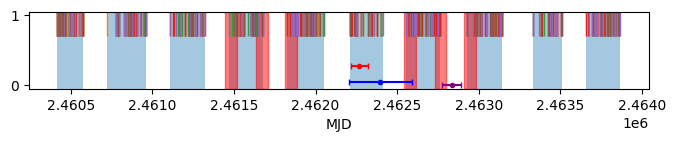

In [22]:
#set(true['categories'])
plt.figure(figsize=(8,1))
for group in result:
    plt.axvspan(min(group)+2400000.5,max(group)+2400000.5,alpha=0.4)

for fil in 'ugrizy':
    plt.plot(dataSlice['observationStartMJD'][dataSlice['filter']==fil]+2400000.5, np.ones(len(dataSlice['observationStartMJD'][dataSlice['filter']==fil])),'|',markersize=30)

for season in nominal_seasons:
    plt.axvspan(Time(season['start'], format='isot').jd,Time(season['end'], format='isot').jd,alpha=0.5,color='red')

plt.xlabel('MJD')

cats="ABD"
color_cat={'A':'b','B':'r','C':'k','D':'purple'}
for cat in cats:
    for i in range(0,1):
        # if true['te'].values[i]<60:
        # interval = (true['t0'][true["categories"]==cat].values[i]-true['te'][true["categories"]==cat].values[i]-2400000.5, true['t0'][true["categories"]==cat].values[i]+true['te'][true["categories"]==cat].values[i]-2400000.5)
        plt.errorbar(true[true["categories"]==cat]['t0'].values[i],np.random.uniform(0,1),yerr=None,xerr=true[true["categories"]==cat]['te'].values[i],color=color_cat[cat],marker='.',alpha=1,capsize=2)


For the propagation of $\pi_E$ I have to take into account the term outside the diagonal in the covariance matrix
$$\sigma_{\pi_E}^2 = 2Cov(\pi_{EE},\pi_{EN})\frac{\partial \pi_E}{\partial \pi_{EE}}\frac{\partial \pi_E}{\partial \pi_{EN}}+\left(\frac{\partial \pi_E}{\partial \pi_{EE}}\sigma_{\pi_{EE}}\right)^2+\left(\frac{\partial \pi_E}{\partial \pi_{EN}}\sigma_{\pi_{EN}}\right)^2$$

In [23]:
fit_rr['piE']=np.sqrt(fit_rr['piEN']**2+fit_rr['piEE']**2)
fit_rr['piE_err'] = (1/fit_rr['piE'])*np.sqrt((fit_rr['piEN_err']*fit_rr['piEN'])**2+(fit_rr['piEE_err']*fit_rr['piEE'])**2+2*fit_rr['piEE']*fit_rr['piEN']*fit_rr['cov_piEE_piEN'])

fit_roman['piE']=np.sqrt(fit_roman['piEN']**2+fit_roman['piEE']**2)
fit_roman['piE_err'] = (1/fit_roman['piE'])*np.sqrt((fit_roman['piEN_err']*fit_roman['piEN'])**2+(fit_roman['piEE_err']*fit_roman['piEE'])**2+2*fit_roman['piEE']*fit_roman['piEN']*fit_roman['cov_piEE_piEN'])

true['piE']=np.sqrt(true['piEN']**2+true['piEE']**2)



In [24]:
residuals_ratio['piE'] = np.abs(fit_rr['piE']-true['piE'])/np.abs(fit_roman['piE']-true['piE'])
err_ratio['piE'] = fit_rr['piE_err']/fit_roman['piE_err']

In [25]:
m1_piE_rr = np.abs(fit_rr['piE']-true['piE'])/true['piE']
m1_piE_roman = np.abs(fit_roman['piE']-true['piE'])/true['piE']
met_1_roman['piE'] = m1_piE_roman
met_1_rr['piE'] = m1_piE_rr

m2_piE_rr = np.abs(fit_rr['piE']-true['piE'])/fit_rr['piE_err']
m2_piE_roman = np.abs(fit_roman['piE']-true['piE'])/fit_roman['piE_err']
met_2_roman['piE'] = m2_piE_roman
met_2_rr['piE'] = m2_piE_rr

m3_piE_rr = fit_rr['piE_err']/fit_rr['piE']
m3_piE_roman = fit_roman['piE_err']/fit_roman['piE']
met_3_roman['piE'] =m3_piE_roman 
met_3_rr['piE'] = m3_piE_rr


0 0
0 1
0 2
1 0
1 1


/tmp/ipykernel_8578/3338618643.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


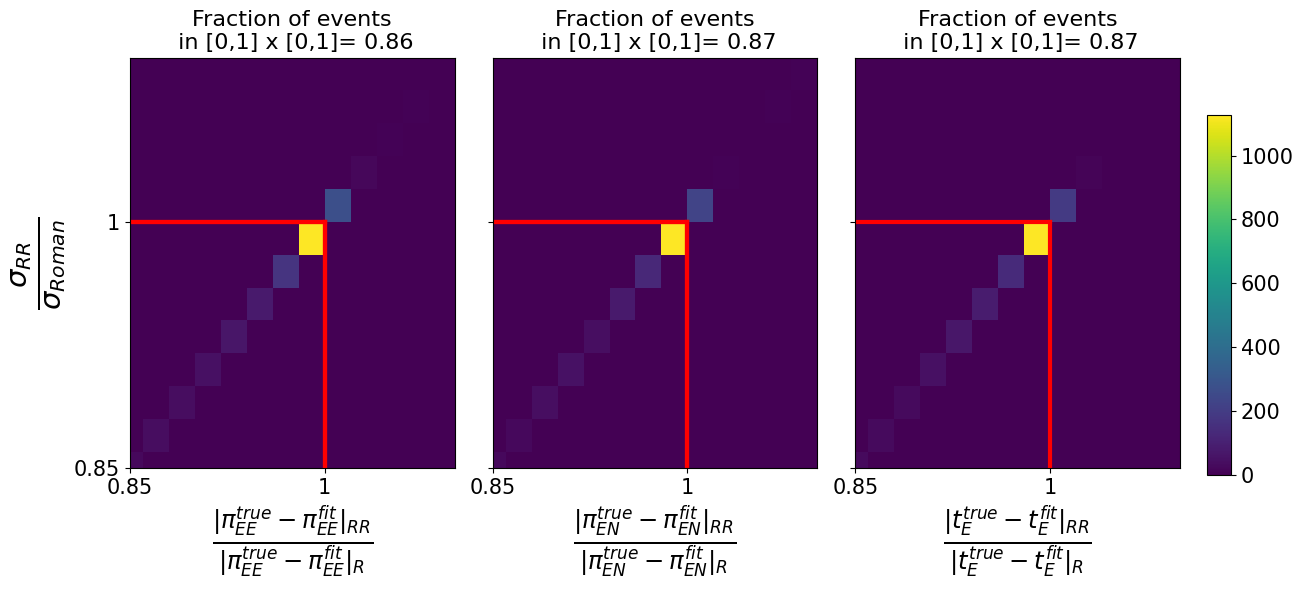

In [26]:
# def plot_comparisons(err_ratio, residuals_ratio,opsim,model):
%matplotlib inline
plt.close('all')
err_ratio, residuals_ratio,opsim,model = err_ratio, residuals_ratio, 'Baseline', 'PSPL'
fractions = []
labels = {'t0':'t_0', 'u0':'u_0', 'te':'t_E','rho':'\\rho', 's':'s', 'q':'q', 'alpha':'\\alpha', 'piEE':'\pi_{EE}', 'piEN':'\pi_{EN}', 'piE':'\pi_{E}'}
# Define your data and properties as given in your code
if 'PSPL' in model:
    properties = ('t0', 'u0', 'te', 'piEE', 'piEN')
elif 'USPL' in model:
    properties = ('te','rho', 'piE')
else:
    properties = ('t0', 'u0', 'te','rho', 's', 'q', 'alpha', 'piEE', 'piEN')
fig, axs = plt.subplots(1,3, figsize=(12, 6),sharey=True)
cbar_axs = [fig.add_axes([1.01, 0.2, 0.02, 0.6])]#,  # Color bar for the first row
Categories = {'B':'Roman gap but Rubin season','C':'Rubin gap but Roman season','D':'Overlap seasons'}
n=1
for i, p in enumerate(properties):
    row, col = divmod(i, 3) 
    print(row, col)

    im = axs[col].hist2d(residuals_ratio[p]
                              , err_ratio[p], bins=[np.arange(0, 1.2, 0.02), np.arange(0., 1.2, 0.02)])
    # print(len(m1_ratio[p]))
    label_m1 = r'$\frac{|'+f'{labels[p]}'+'^{true}-'+f'{labels[p]}'+'^{fit}|_{RR}}{|'+f'{labels[p]}'+'^{true}-'+f'{labels[p]}'+'^{fit}|_{R}}$'#+f'{labels[p]}'+'^{true}}$'#+r'$\frac{|'+f'{p}'+'^{true}-'+f'{p}'+'^{fit}|_{RR}}{'+f'{p}'+'^{true}}$'
    axs[col].set_xlabel(label_m1,fontsize=25)
    axs[ col].set_xticks([0.85,1,1.15],[0.85,1,1.15],fontsize=15)
    axs[ col].set_yticks([0.85,1,1.15],[0.85,1,1.15],fontsize=15)
    # Calculate the number of events in [0,1] x [0,1] square
    x_min, x_max = 0, 1
    y_min, y_max = 0, 1
    axs[ col].plot(np.linspace(0.,1,15),np.ones(15),color='red',marker=' ', linestyle='-',lw=3)
    axs[ col].plot(np.ones(15),np.linspace(0.,1,15),color='red',marker=' ', linestyle='-',lw=3)
    axs[ col].plot(np.linspace(0.,1,15),np.ones(15)*0,color='red',marker=' ', linestyle='-',lw=3)
    axs[ col].plot(np.ones(15)*0,np.linspace(0.,1,15),color='red',marker=' ', linestyle='-',lw=3)

    df = err_ratio[(err_ratio[p]<y_max) & (err_ratio[p]>y_min)]
    # display(df)
#         # df0 = residuals_ratio[residuals_ratio['source'].isin(df_cat['source'][df_cat['cat']==cat].values.astype(int))]
    number_in_square = len(df[(df[p] <x_max) & (df[p] >x_min)])/len(residuals_ratio)

#         # Label for the text annotation
    text_x = 1  # X-coordinate for the text
    text_y = 0.4  # Y-coordinate for the text (negative to go below the figure)
    text = f"Fraction of events\n in [{x_min},{x_max}] x [{y_min},{y_max}]= {round(number_in_square ,2)}"  # Insert the number here
    axs[ col].set_title(text, fontsize = 16)

    if col == 0:
        axs[ col].set_ylabel(r'$\frac{ \sigma_{RR} }{\sigma_{Roman}}$',fontsize=30)

    axs[ col].set_xlim(0.85,1.1)
    axs[ col].set_ylim(0.85, 1.1)

    fig.colorbar(im[3], cax=cbar_axs[0])
    cbar = fig.colorbar(im[3], cax=cbar_axs[0])
    cbar.ax.tick_params(labelsize=15)
# plt.suptitle(opsim  +f' {model} - '+Categories[cat],fontsize=30)    
plt.tight_layout()
# plt.savefig(f'/home/anibal/FIGURES_roman_rubin/{model}_{opsim}_{cat}.png')
plt.show()

/tmp/ipykernel_8578/1371605666.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


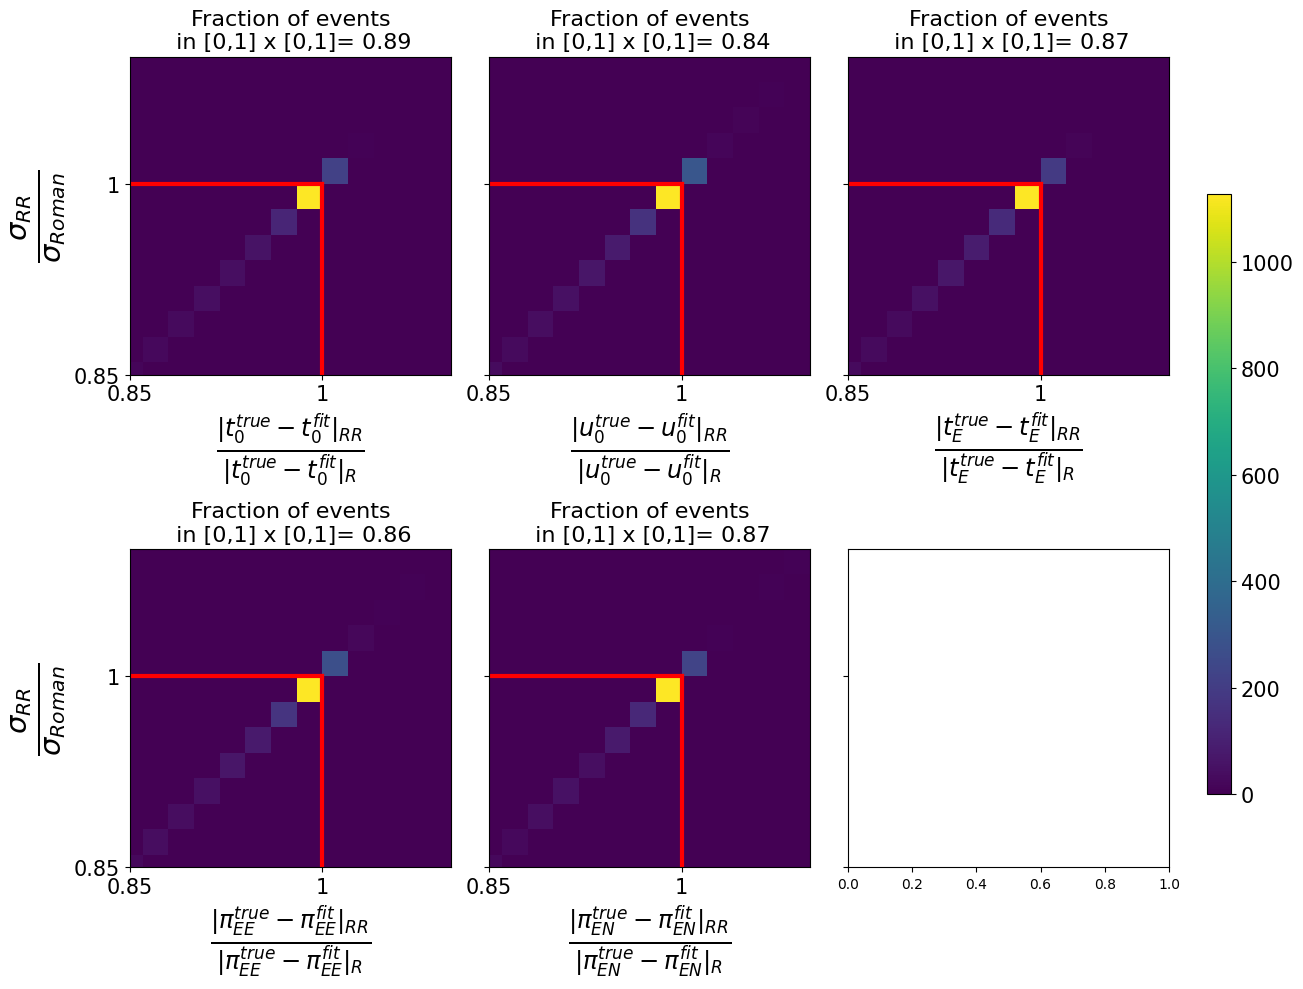

In [27]:
def plot_comparisons(err_ratio, residuals_ratio,opsim,model):
    fractions = []
    labels = {'t0':'t_0', 'u0':'u_0', 'te':'t_E','rho':'\\rho', 's':'s', 'q':'q', 'alpha':'\\alpha', 'piEE':'\pi_{EE}', 'piEN':'\pi_{EN}'}
    # Define your data and properties as given in your code
    if 'PSPL' in model:
        properties = ('t0', 'u0', 'te', 'piEE', 'piEN')
    elif 'USPL' in model:
        properties = ('t0', 'u0', 'te','rho', 'piEE', 'piEN')
    else:
        properties = ('t0', 'u0', 'te','rho', 's', 'q', 'alpha', 'piEE', 'piEN')
    fig, axs = plt.subplots(2,3, figsize=(12, 10),sharey=True)
    cbar_axs = [fig.add_axes([1.01, 0.2, 0.02, 0.6])]#,  # Color bar for the first row
    Categories = {'B':'Roman gap but Rubin season','C':'Rubin gap but Roman season','D':'Overlap seasons'}
    n=1
    for i, p in enumerate(properties):
        row, col = divmod(i, 3)  # Calculate the row and column index for the current subplot
        # m1_ratio = met_1_ratio[met_1_ratio['source'].isin(df_cat['source'][df_cat['cat']==cat].values.astype(int))]
        # print(len(m1_ratio))
        im = axs[row, col].hist2d(residuals_ratio[p]
                                  , err_ratio[p], bins=[np.arange(0, 1.2, 0.02), np.arange(0., 1.2, 0.02)])
        # print(len(m1_ratio[p]))
        label_m1 = r'$\frac{|'+f'{labels[p]}'+'^{true}-'+f'{labels[p]}'+'^{fit}|_{RR}}{|'+f'{labels[p]}'+'^{true}-'+f'{labels[p]}'+'^{fit}|_{R}}$'#+f'{labels[p]}'+'^{true}}$'#+r'$\frac{|'+f'{p}'+'^{true}-'+f'{p}'+'^{fit}|_{RR}}{'+f'{p}'+'^{true}}$'
        axs[row, col].set_xlabel(label_m1,fontsize=25)
        axs[row, col].set_xticks([0.85,1,1.15],[0.85,1,1.15],fontsize=15)
        axs[row, col].set_yticks([0.85,1,1.15],[0.85,1,1.15],fontsize=15)
        # Calculate the number of events in [0,1] x [0,1] square
        x_min, x_max = 0, 1
        y_min, y_max = 0, 1
        axs[row, col].plot(np.linspace(0.,1,15),np.ones(15),color='red',marker=' ', linestyle='-',lw=3)
        axs[row, col].plot(np.ones(15),np.linspace(0.,1,15),color='red',marker=' ', linestyle='-',lw=3)
        axs[row, col].plot(np.linspace(0.,1,15),np.ones(15)*0,color='red',marker=' ', linestyle='-',lw=3)
        axs[row, col].plot(np.ones(15)*0,np.linspace(0.,1,15),color='red',marker=' ', linestyle='-',lw=3)

        df = err_ratio[(err_ratio[p]<y_max) & (err_ratio[p]>y_min)]
        # display(df)
#         # df0 = residuals_ratio[residuals_ratio['source'].isin(df_cat['source'][df_cat['cat']==cat].values.astype(int))]
        number_in_square = len(df[(df[p] <x_max) & (df[p] >x_min)])/len(residuals_ratio)
        
#         # Label for the text annotation
        text_x = 1  # X-coordinate for the text
        text_y = 0.4  # Y-coordinate for the text (negative to go below the figure)
        text = f"Fraction of events\n in [{x_min},{x_max}] x [{y_min},{y_max}]= {round(number_in_square ,2)}"  # Insert the number here
        axs[row, col].set_title(text, fontsize = 16)

        if col == 0:
            axs[row, col].set_ylabel(r'$\frac{ \sigma_{RR} }{\sigma_{Roman}}$',fontsize=30)

        axs[row, col].set_xlim(0.85,1.1)
        axs[row, col].set_ylim(0.85, 1.1)

        fig.colorbar(im[3], cax=cbar_axs[0])
        cbar = fig.colorbar(im[3], cax=cbar_axs[0])
        cbar.ax.tick_params(labelsize=15)
    # plt.suptitle(opsim  +f' {model} - '+Categories[cat],fontsize=30)    
    plt.tight_layout()
    # plt.savefig(f'/home/anibal/FIGURES_roman_rubin/{model}_{opsim}_{cat}.png')
    plt.show()

cat = 'B'
plot_comparisons(err_ratio, residuals_ratio, 'Baseline', 'PSPL')

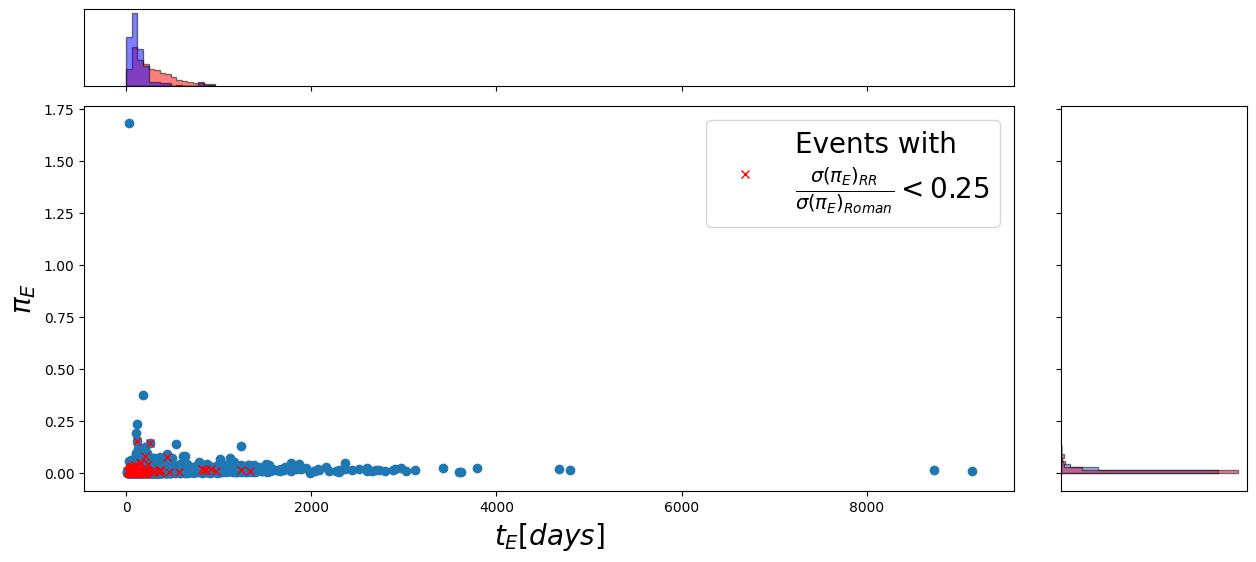

In [28]:
#x = residuals_ratio['te']
labelsparams = lambda p: labels[p]

label_m3 = lambda p :r'$\frac{\sigma_{'+f'{labels[p]}'+'}}{'+f'{labels[p]}'+'^{fit}}$'#+f'{labels[p]}'+'}}$'

label_m2 = lambda p :r'$\frac{|'+f'{labels[p]}'+'^{true}-'+f'{labels[p]}'+'^{fit}|}{\sigma_{'+f'{labels[p]}'+'}}$'
fig, ax = plt.subplots(1, 1, figsize = (12, 5), sharey=True, gridspec_kw={'width_ratios': [1]})

q='te'
ax.plot(true['te'],true['piE'],marker='o',ls='')#,bins=np.linspace(min(true[q]), max(true[q]),15))
ax.plot(true['te'][true['Source'].isin(err_ratio['Source'][err_ratio['piE']<0.25])], true['piE'][true['Source'].isin(err_ratio['Source'][err_ratio['piE']<0.25])],marker='x',ls='',color='red',label='Events with\n'+r'$\frac{\sigma(\pi_E)_{RR}}{\sigma(\pi_E)_{Roman}}<0.25$')#,bins=np.linspace(min(true[q]), max(true[q]),15))
ax.set_xlabel(r'$t_E [days]$',fontsize=20)
ax.set_ylabel(r'$\pi_E$',fontsize=20)

ax_histx = ax.inset_axes([0, 1.05, 1, 0.2], sharex=ax)
ax_histy = ax.inset_axes([1.05, 0, 0.2, 1], sharey=ax)

# Histogram settings
#binwidth = 0.1
ax_histx.hist(true['te'], bins=np.arange(0, 1000, 60), density=True, histtype='stepfilled', edgecolor='k', fill=True, alpha=0.5, color='red')
ax_histx.hist(true['te'][true['Source'].isin(err_ratio['Source'][err_ratio['piE']<0.25])], bins=np.arange(0, 1000, 60), density=True, histtype='stepfilled', edgecolor='k', fill=True, alpha=0.5, color='blue')

ax_histy.hist(true['piE'], bins=np.arange(0, 0.15, 0.015), density=True, histtype='stepfilled', edgecolor='k', fill=True, alpha=0.5, color='royalblue', orientation='horizontal')
ax_histy.hist(true['piE'][true['Source'].isin(err_ratio['Source'][err_ratio['piE']<0.25])], bins=np.arange(0, 0.15, 0.015), density=True, histtype='stepfilled', edgecolor='k', fill=True, alpha=0.5, color='crimson', orientation='horizontal')

#ax_histy.set_xscale("log")
# Remove ticks from inset histograms
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histx.tick_params(axis="y", left=False, labelleft=False)
ax_histy.tick_params(axis="y", labelleft=False)
ax_histy.tick_params(axis="x", bottom=False, labelbottom=False)
ax.legend(loc='best',fontsize=20)


In [29]:
labelsparams = lambda p: labels[p]

label_m3 = lambda p :r'$\frac{\sigma_{'+f'{labels[p]}'+'}}{'+f'{labels[p]}'+'^{fit}}$'#+f'{labels[p]}'+'}}$'
label_m2 = lambda p :r'$\frac{|'+f'{labels[p]}'+'^{true}-'+f'{labels[p]}'+'^{fit}|}{\sigma_{'+f'{labels[p]}'+'}}$'


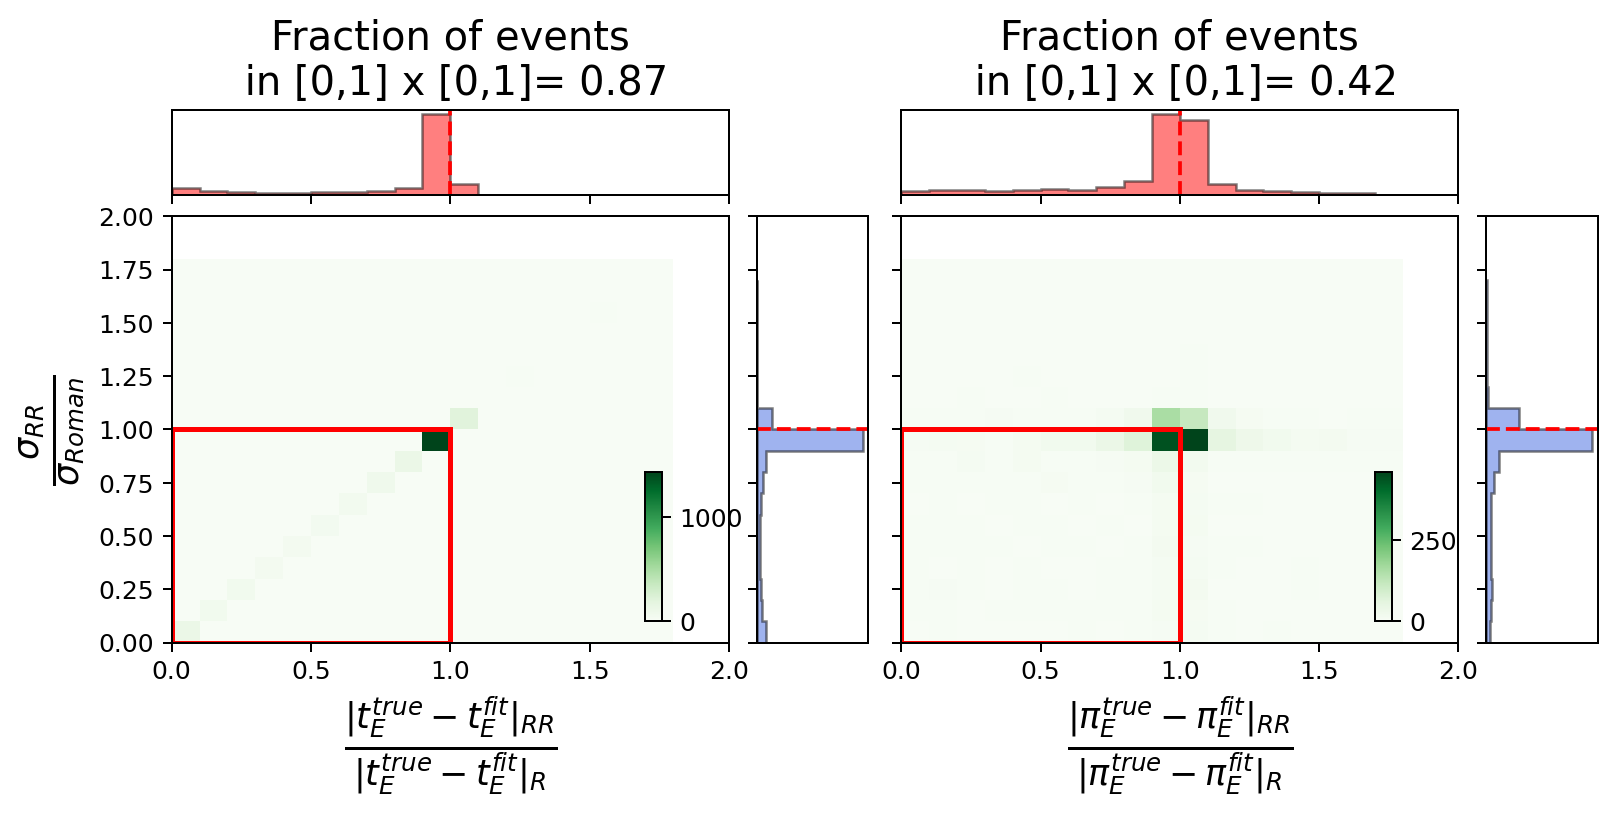

In [30]:
labels = {'t0':'t_0', 'u0':'u_0', 'te':'t_E','rho':'\\rho', 's':'s', 'q':'q', 'alpha':'\\alpha', 'piE':'\pi_{E}', 'piEN':'\pi_{EN}'}

def create_hist2d_with_marginals(ax, x, y, labels, p, first_col=False):
    # Main scatter plot
    hb = ax.hist2d(x, y, bins=(np.arange(0, 1.9, 0.1), np.arange(0, 1.9, 0.1)), cmap='Greens')
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 2)
    # Create inset axes for the histograms
    ax_histx = ax.inset_axes([0, 1.05, 1, 0.2], sharex=ax)
    ax_histy = ax.inset_axes([1.05, 0, 0.2, 1], sharey=ax)
    # Histogram settings
    binwidth = 0.1
    ax_histx.hist(x, bins=np.arange(0, 1.8, binwidth), density=True, histtype='stepfilled', edgecolor='k', fill=True, alpha=0.5, color='red')
    ax_histy.hist(y, bins=np.arange(0, 1.8, binwidth), density=True, histtype='stepfilled', edgecolor='k', fill=True, alpha=0.5, color='royalblue', orientation='horizontal')
    # Remove ticks from inset histograms
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histx.tick_params(axis="y", left=False, labelleft=False)
    ax_histy.tick_params(axis="y", labelleft=False)
    ax_histy.tick_params(axis="x", bottom=False, labelbottom=False)
    # ax_histy.set_yscale("log")
    # Add vertical and horizontal lines
    ax_histx.axvline(1, color='red', ls='--')
    ax_histy.axhline(1, color='red', ls='--')
    ax.axvline(1, ymin=0, ymax=0.5, lw=2, color='red')
    ax.axvline(0, ymin=0, ymax=0.5, lw=2, color='red')
    ax.axhline(0, xmin=0, xmax=0.5, lw=2, color='red')
    ax.axhline(1, xmin=0, xmax=0.5, lw=2, color='red')
    # Set labels with LaTeX formatting
    label_m1 = lambda p: r'$\frac{|' + f'{labels[p]}' + r'^{true}-' + f'{labels[p]}' + r'^{fit}|_{RR}}{|' + f'{labels[p]}' + r'^{true}-' + f'{labels[p]}' + r'^{fit}|_{R}}$'
    label_m2 = r'$\frac{\sigma_{RR}}{\sigma_{Roman}}$'
    ax.set_xlabel(label_m1(p), fontsize=20)
    # ax.set_xlabel("a",fontsize=20)
    if first_col:
        ax.set_ylabel(label_m2, fontsize=20)
    # Add a colorbar inside the main plot
    cax = ax.inset_axes([0.85, 0.05, 0.03, 0.35], transform=ax.transAxes)
    cbar = plt.colorbar(hb[3], cax=cax, orientation='vertical')
    # cax.set_yticks([0, 50, 1000])
    # cax.set_yticklabels([0, 100, 2000], fontsize=8)
    x_min=0
    x_max=1
    y_min=0
    y_max=1
    fil_x= x[(y<1)&(y>0)]
    filtered=fil_x[(fil_x<1)&(fil_x>0)]

    number_in_square = len(filtered)/len(y)
    text = f"Fraction of events\n in [{x_min},{x_max}] x [{y_min},{y_max}]= {round(number_in_square ,2)}"  # Insert the number here
    ax.set_title(text, fontsize = 16)

# Example usage
fig, axes = plt.subplots(1, 2, figsize=(9, 5), dpi=180,sharey=True, gridspec_kw={'width_ratios': [1, 1]})
fig.subplots_adjust(hspace=0.5, wspace=0.5)
x = residuals_ratio['te']
y = err_ratio['te']
# x2 = residuals_ratio['rho']
# y2 = err_ratio['rho']
x3 = residuals_ratio['piE']
y3 = err_ratio['piE']
cat = 'A'
mask = residuals_ratio['Source'].isin(true['Source'][true['categories']==cat])

create_hist2d_with_marginals(axes[0], x, y, labels, 'te', first_col=True)
# create_hist2d_with_marginals(axes[1], x2, y2, labels, 'rho')
create_hist2d_with_marginals(axes[1], x3, y3, labels, 'piE')

plt.tight_layout()
plt.show()

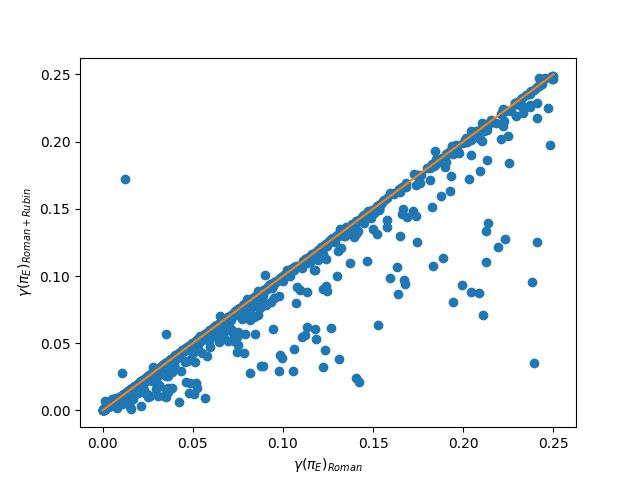

In [105]:
plt.close('all')
set_rr = met_3_rr['Source'][met_3_rr['piE']<0.25]
# print(met_3_rr['Source'][met_3_rr['piE']<0.25])
set_roman = met_3_roman['Source'][met_3_roman['piE']<0.25]

intersection_rel_error = list(set(set_roman).intersection(set(set_rr)))
# print(intersection_rel_error)
plt.plot(met_3_roman['piE'][met_3_roman['Source'].isin(intersection_rel_error)],
           met_3_rr['piE'][met_3_rr['Source'].isin(intersection_rel_error)],marker='o',ls='')
dots = np.linspace(0,0.25,100)
plt.plot(dots,dots)
           # bins=(np.arange(0,0.25,0.01),np.arange(0,0.25,0.01)),density=True)#,
        # marker='o',ls='')
plt.xlabel(r"$\gamma(\pi_E)_{Roman}$")
plt.ylabel(r"$\gamma(\pi_E)_{Roman+Rubin}$")
plt.show()
# residuals_ratio['te']

In [126]:
interseting_events = met_3_rr['piE'][met_3_rr['Source'].isin(intersection_rel_error)]/met_3_roman['piE'][met_3_roman['Source'].isin(intersection_rel_error)]
print(len(interseting_events[interseting_events<0.5])/len(true))
print(len(interseting_events[interseting_events<0.5]))

0.020614219604543543
49


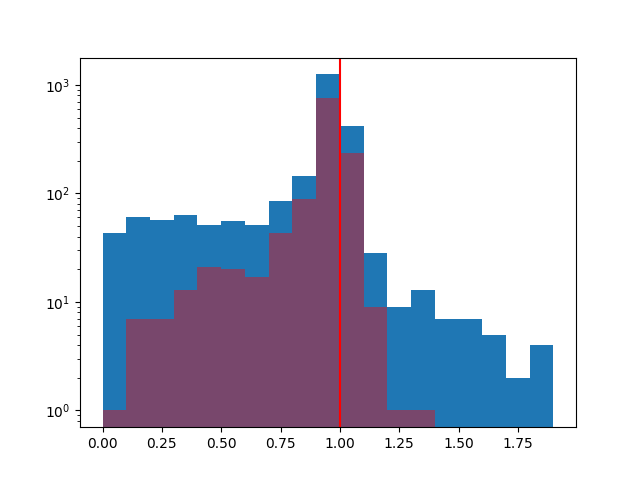

In [104]:
plt.close('all')
plt.hist(met_3_rr['piE']/met_3_roman['piE'],bins=np.arange(0,2,0.1))
plt.hist(met_3_rr['piE'][met_3_rr['Source'].isin(intersection_rel_error)]/met_3_roman['piE'][met_3_roman['Source'].isin(intersection_rel_error)],bins=np.arange(0,1.5,0.1),color='red',alpha=0.4)
plt.axvline(1,color='red')
plt.yscale('log')
plt.show()

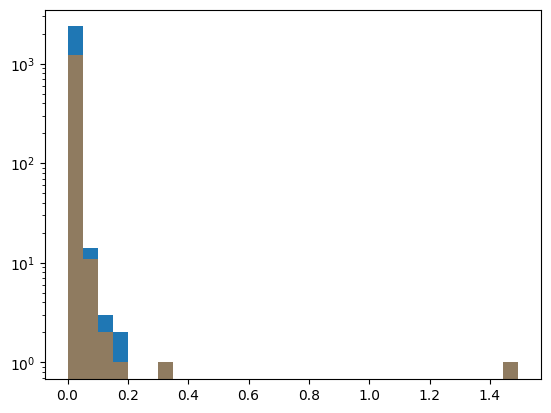

In [123]:
%matplotlib inline
plt.close('all')
plt.hist(true['piEN'],bins=30)
plt.hist(true['piEN'][true['Source'].isin(intersection_rel_error)],alpha=0.5,bins=30)
plt.yscale('log')
plt.show()

In [32]:
residuals_ratio['categories']=true['categories']
err_ratio['categories']=true['categories']

In [33]:
# residuals_ratio

The MSE is defined as 
$$MSE(\hat{\theta}) = bias(\hat{\theta}) + Var(\hat{\theta}) $$

In [34]:
# plt.hist(residuals_ratio['te'],bins=np.arange(0,2,0.1))

In [35]:
# print(len(true))
# print(len(fit_rr))
# print(len(fit_roman))

14.009255363904082


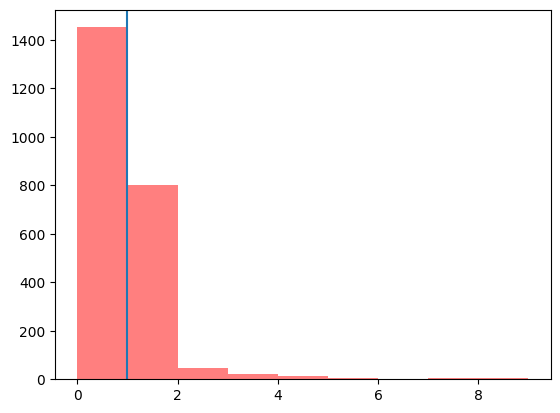

In [36]:
p='piE'

MSE_rr = abs(fit_rr[p]-true[p]) + fit_rr[p+'_err']**2
MSE_roman = abs(fit_roman[p]-true[p]) + fit_roman[p+'_err']**2
MSE_ratio = MSE_rr/MSE_roman
print(100*len(MSE_ratio[MSE_ratio<0.5])/len(MSE_ratio))
plt.hist(MSE_ratio,bins=np.arange(0,10,1),color='red',alpha=0.5)
plt.axvline(1)
# plt.hist(,bins=np.arange(0,0.05,0.001),alpha=0.5,color='blue')
# plt.hist()
plt.show()

### bias/true

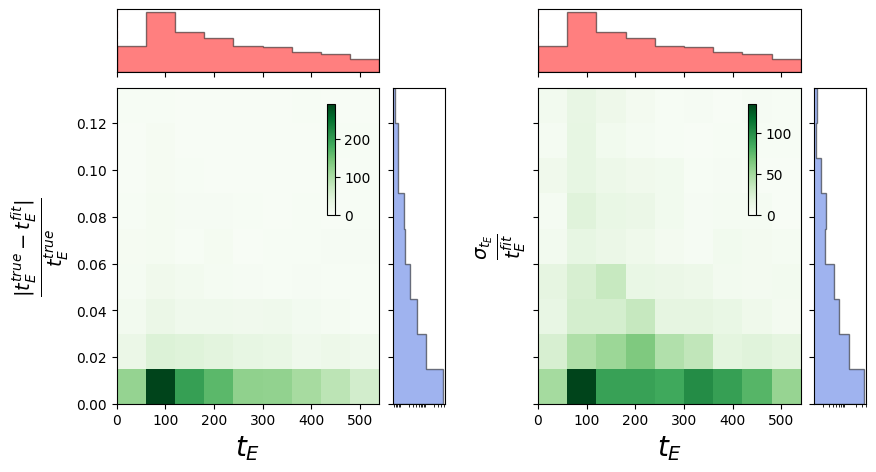

In [164]:
labelsparams = lambda p: labels[p]

label_m1 = lambda p: r'$\frac{|'+f'{labels[p]}'+'^{true}-'+f'{labels[p]}'+'^{fit}|}{'+f'{labels[p]}'+'^{true}'+'}$'
label_m3 = lambda p :r'$\frac{\sigma_{'+f'{labels[p]}'+'}}{'+f'{labels[p]}'+'^{fit}}$'#+f'{labels[p]}'+'}}$'
label_m2 = lambda p :r'$\frac{|'+f'{labels[p]}'+'^{true}-'+f'{labels[p]}'+'^{fit}|}{\sigma_{'+f'{labels[p]}'+'}}$'

def create_hist2d_with_marginals(ax, x, y, ylabel_func,xlabel_func, p, first_col=False):
    # Main scatter plot
    hb = ax.hist2d(x, y, bins=(np.arange(0, 600, 60), np.arange(0, 0.15, 0.015)), cmap='Greens')
    # Create inset axes for the histograms
    ax_histx = ax.inset_axes([0, 1.05, 1, 0.2], sharex=ax)
    ax_histy = ax.inset_axes([1.05, 0, 0.2, 1], sharey=ax)
    # Histogram settings
    binwidth = 0.1
    ax_histx.hist(x, bins=np.arange(0, 600, 60), density=True, histtype='stepfilled', edgecolor='k', fill=True, alpha=0.5, color='red')
    ax_histy.hist(y, bins=np.arange(0, 0.15, 0.015), density=True, histtype='step', edgecolor='k', fill=True, alpha=0.5, color='royalblue', orientation='horizontal')
    ax_histy.set_xscale("log")
    # Remove ticks from inset histograms
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histx.tick_params(axis="y", left=False, labelleft=False)
    ax_histy.tick_params(axis="y", labelleft=False)
    ax_histy.tick_params(axis="x", bottom=False, labelbottom=False)
    # Add vertical and horizontal lines
    ax_histx.axvline(1, color='red', ls='--')
    ax_histy.axhline(1, color='red', ls='--')
    # Set labels with LaTeX formatting
    label_m1 = lambda p: r'$\frac{|' + f'{labels[p]}' + r'^{\text{true}}-' + f'{labels[p]}' + r'^{\text{fit}}|_{RR}}{|' + f'{labels[p]}' + r'^{\text{true}}-' + f'{labels[p]}' + r'^{\text{fit}}|_{R}}$'
    label_m2 = r'$\frac{\sigma_{RR}}{\sigma_{\text{Roman}}}$'

    ax.set_ylabel(ylabel_func(p), fontsize=20)
    ax.set_xlabel(f'${xlabel_func(p)}$', fontsize=20)
    cax = ax.inset_axes([0.8, 0.6, 0.03, 0.35], transform=ax.transAxes)
    cbar = plt.colorbar(hb[3], cax=cax, orientation='vertical')

fig, axes = plt.subplots(1, 2, figsize=(9, 5), sharey=True, gridspec_kw={'width_ratios': [1, 1]})
x = residuals_ratio['te']
y = err_ratio['te']
# x2 = residuals_ratio['rho']
# y2 = err_ratio['rho']
x3 = residuals_ratio['piE']
y3 = err_ratio['piE']

p='te'
create_hist2d_with_marginals(axes[0], fit_rr[p], met_1_rr[p], label_m1, labelsparams, 'te', first_col=True)
# create_hist2d_with_marginals(axes[1], fit_rr[p], met_2_rr[p], label_m2, labelsparams, 'te')
create_hist2d_with_marginals(axes[1], fit_rr[p], met_3_rr[p], label_m3, labelsparams, 'te')
# create_hist2d_with_marginals(axes[1], x2, y2, labels, 'rho')
# create_hist2d_with_marginals(axes[2], x3, y3, labels, 'piE')

plt.tight_layout()
plt.show()

In [38]:
# met_1_roman

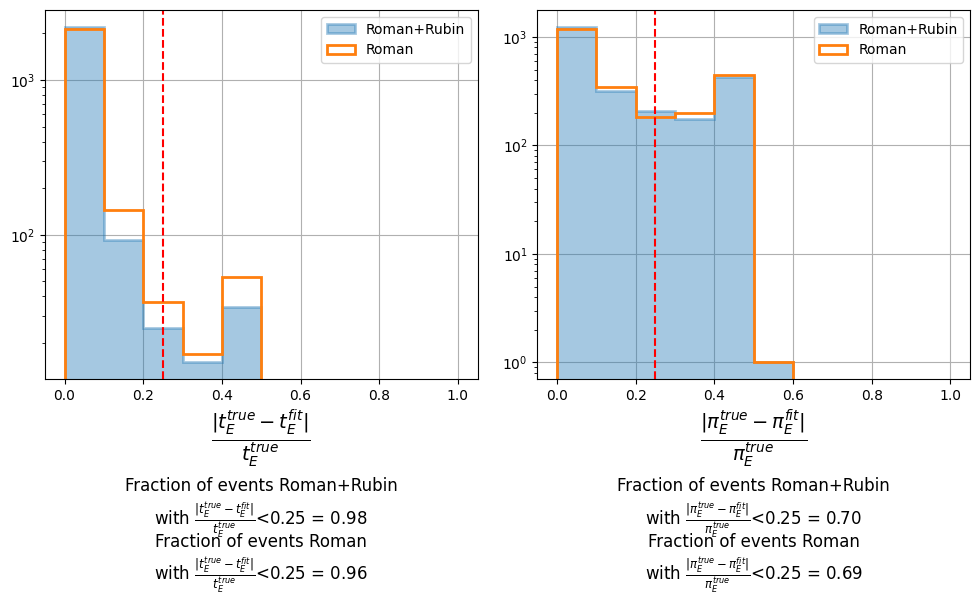

In [171]:

cats_labels = {'A': 'Overlap seasons Roman and Rubin', 'B': 'Roman gap and Rubin season','C': 'gap Roman and gap Rubin', 'D': 'Season Roman and gap Rubin'}
# Function to plot histograms and annotations
def plot_histogram(ax, data1, data2, xlabel, title):
    # ax.set_title(title)
    ax.hist(data1, bins=np.arange(0, 1.1, 0.1), fill=True, alpha=0.4, histtype='step',lw=2, label='Roman+Rubin')
    ax.hist(data2, bins=np.arange(0, 1.1, 0.1), fill=False, alpha=1, histtype='step', lw=2,label='Roman')
    ax.set_xlabel(xlabel, fontsize=20)
    ax.axvline(0.25, color='red', linestyle='--')
    ax.legend(loc='best')
    
    fraction_data1 = len(data1[data1 < 0.25]) / len(data1)
    fraction_data2 = len(data2[data2 < 0.25]) / len(data2)
    
    ax.annotate(f'Fraction of events Roman+Rubin\nwith {xlabel}<0.25 = {fraction_data1:.2f}', 
                xy=(0.5, -0.35), xycoords='axes fraction',
                ha='center', va='center', fontsize=12)
    ax.annotate(f'Fraction of events Roman\nwith {xlabel}<0.25 = {fraction_data2:.2f}', 
                xy=(0.5, -0.5), xycoords='axes fraction',
                ha='center', va='center', fontsize=12)

    

fig, axes = plt.subplots(1, 2, figsize=(10, 7))

# Si quiero ver una categoria en particular
cat = 'B'
# plt.suptitle(f'Category: {cats_labels[cat]}')

mask = met_1_rr['Source'].isin(true['Source'][true['categories']==cat])
# Plot for 'te'
p = 'te'
plot_histogram(axes[0], met_1_rr[p], met_1_roman[p], label_m1(p), f'${labels[p]}$')

# # Plot for 'rho'
# q = 'rho'
# plot_histogram(axes[1], met_1_rr[q][mask], met_1_roman[q][mask], label_m1(q), f'${labels[q]}$')
r = 'piE'
plot_histogram(axes[1], met_1_rr[r], met_1_roman[r], r'$\frac{|\pi_E^{true}-\pi_E^{fit}|}{\pi_E^{true}}$', f'$\pi_E$')
# Adjust layout for better spacing
plt.tight_layout()
axes[0].grid(True)
axes[1].grid(True)
axes[1].set_yscale('log')
axes[0].set_yscale('log')
# Show the plot
plt.show()


### bias/sigma

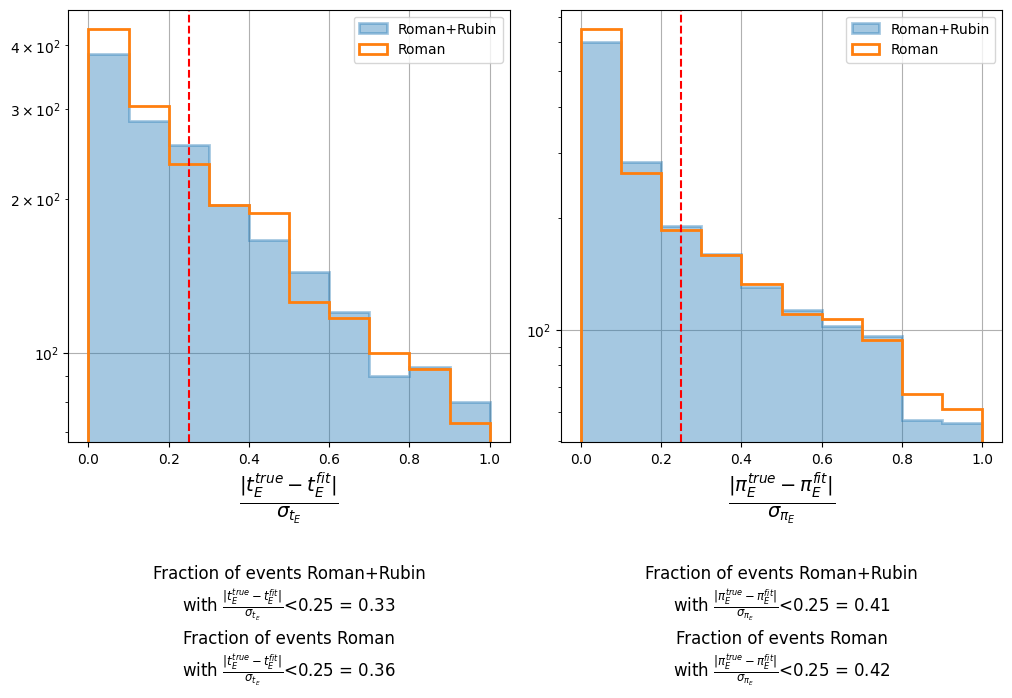

In [174]:
fig, axes = plt.subplots(1, 2, figsize=(10, 8))

cat = 'D'
mask = met_2_rr['Source'].isin(true['Source'][true['categories']==cat])
# Plot for 'te'
p = 'te'
plot_histogram(axes[0], met_2_rr[p], met_2_roman[p], label_m2(p), f'${labels[p]}$')
axes[0].grid(True)
r = 'piE'
plot_histogram(axes[1], met_2_rr[r], met_2_roman[r], r'$\frac{|\pi_E^{true}-\pi_E^{fit}|}{\sigma_{\pi_E}}$', f'$\pi_E$')
# plt.suptitle(f'Category: {cats_labels[cat]}')
# Adjust layout for better spacing
plt.tight_layout()
# plt.grid(True)
axes[0].grid(True)
axes[1].grid(True)
axes[1].set_yscale('log')
axes[0].set_yscale('log')

# Show the plot
plt.show()

### relative error

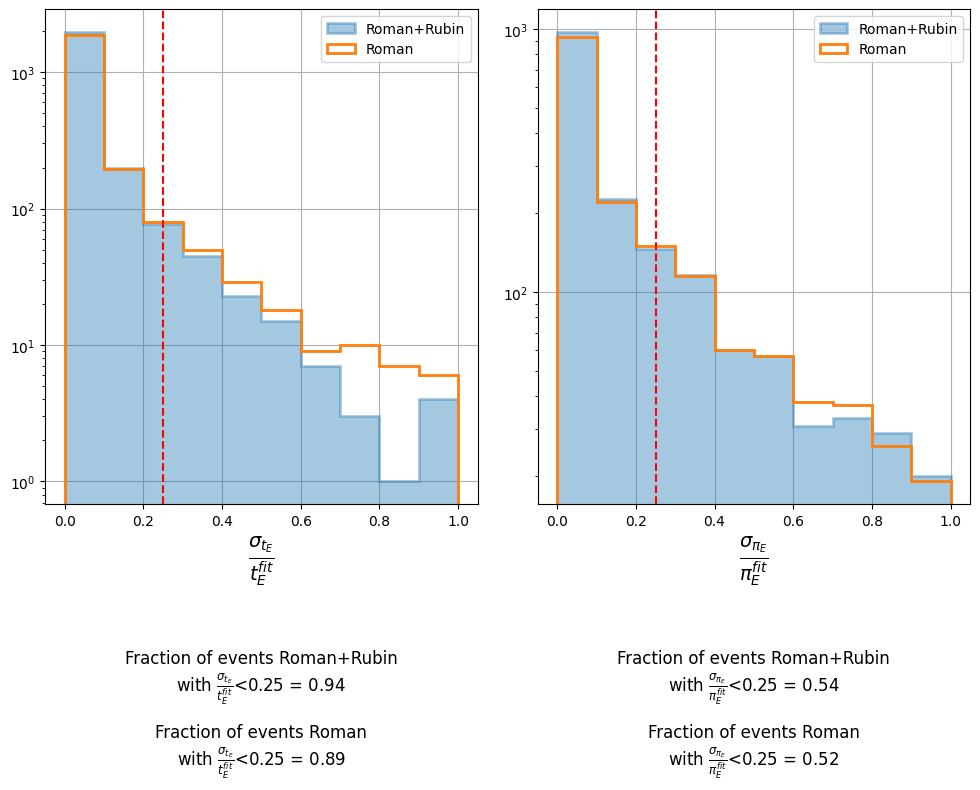

In [176]:
fig, axes = plt.subplots(1, 2, figsize=(10, 9))

cat = 'A'
mask = met_3_rr['Source'].isin(true['Source'][true['categories']==cat])
# Plot for 'te'
p = 'te'
plot_histogram(axes[0], met_3_rr[p], met_3_roman[p], label_m3(p), f'${labels[p]}$')
r = 'piE'
plot_histogram(axes[1], met_3_rr[r], met_3_roman[r], r'$\frac{\sigma_{\pi_E}}{\pi_E^{fit}}$', f'$\pi_E$')
# Adjust layout for better spacing
# axes[1].set_yscale('log')
plt.tight_layout()
axes[0].grid(True)
axes[1].grid(True)
axes[1].set_yscale('log')
axes[0].set_yscale('log')

# Show the plot
plt.show()

In [42]:
len(true['te'][true['te']>1335])/len(true)

0.03786285233487589

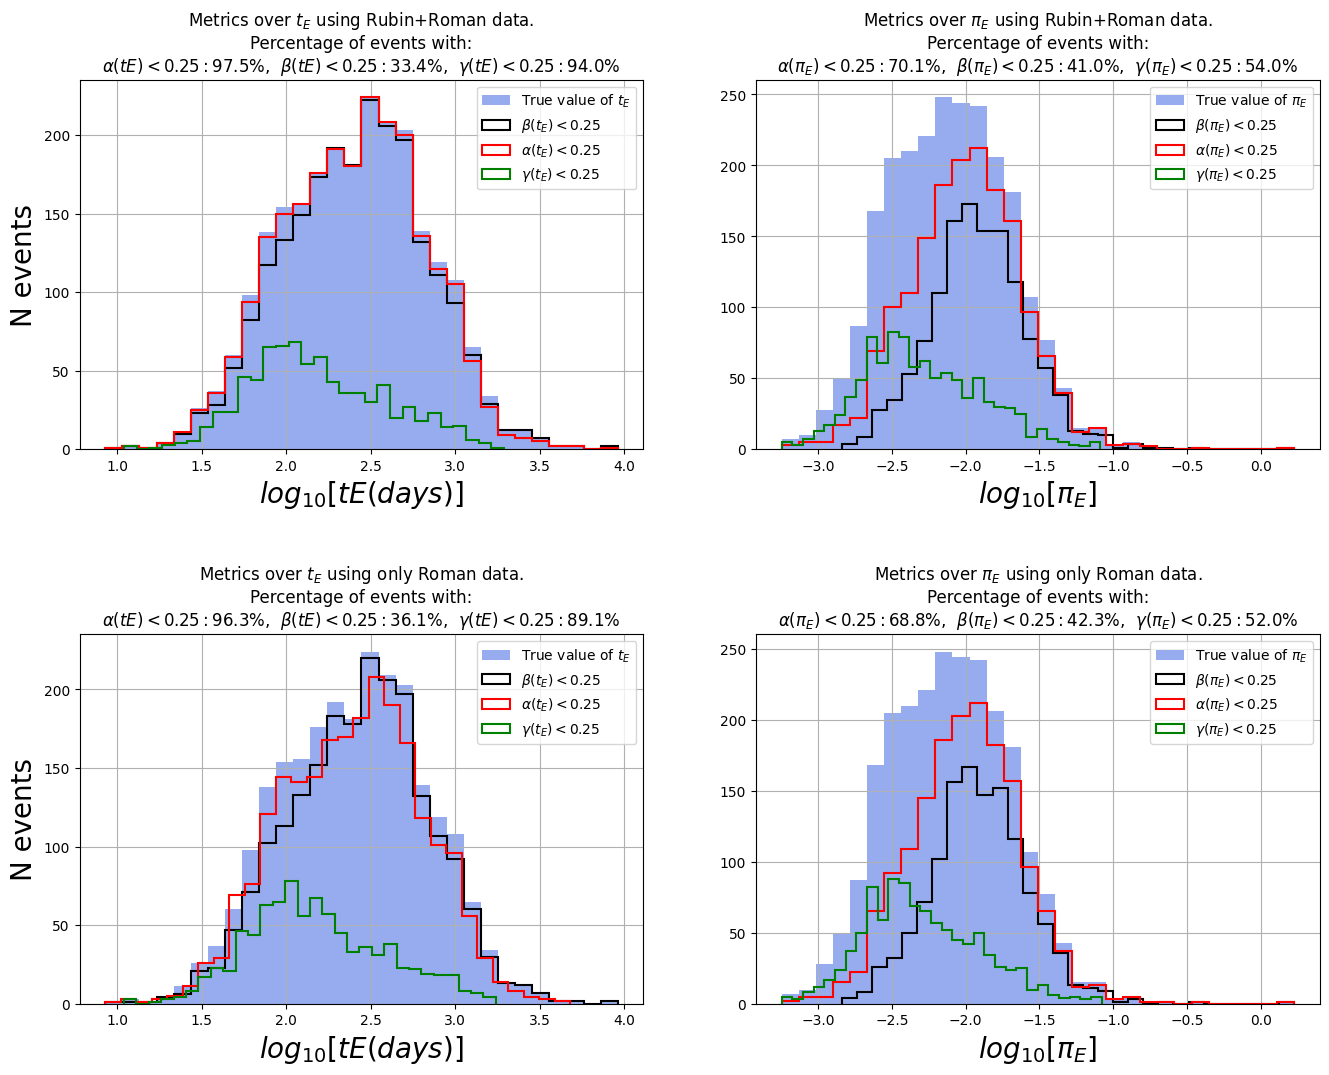

In [43]:
%matplotlib inline
plt.close('all')
# plt.figure(figsize=(8,6))
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.5, wspace=0.2)
axes[0,0].hist(np.log10(true['te']),bins=30,color='royalblue',alpha=0.55,label=r'True value of $t_E$')
axes[0,0].hist(np.log10(true['te'][true['Source'].isin(true['Source'][met_3_rr['te']<0.25])]),bins=30, histtype='step',color='k',lw=1.5,label=r'$\beta(t_E)<0.25$')
axes[0,0].hist(np.log10(true['te'][true['Source'].isin(true['Source'][met_1_rr['te']<0.25])]),bins=30, histtype='step',color='r',lw=1.5,label=r'$\alpha(t_E)<0.25$')
axes[0,0].hist(np.log10(true['te'][true['Source'].isin(true['Source'][met_2_rr['te']<0.25])]),bins=30, histtype='step',color='g',lw=1.5,label=r'$\gamma(t_E)<0.25$')
# plt.axvline(68.2,color='red')
# plt.yscale('log')
axes[0,0].set_xlabel(r'$log_{10}[tE(days)]$',fontsize=20)
axes[0,0].set_ylabel('N events',fontsize=20)
axes[0,0].grid(True)
# plt.show()
# plt.close('all')
# plt.figure(figsize=(8,6))
axes[0,1].hist(np.log10(true['piE']),bins=30,color='royalblue',alpha=0.55,label=r'True value of $\pi_E$')
axes[0,1].hist(np.log10(true['piE'][true['Source'].isin(true['Source'][met_3_rr['piE']<0.25])]),bins=30, histtype='step',color='k',lw=1.5,label=r'$\beta(\pi_E)<0.25$')
axes[0,1].hist(np.log10(true['piE'][true['Source'].isin(true['Source'][met_1_rr['piE']<0.25])]),bins=30, histtype='step',color='r',lw=1.5,label=r'$\alpha(\pi_E)<0.25$')
axes[0,1].hist(np.log10(true['piE'][true['Source'].isin(true['Source'][met_2_rr['piE']<0.25])]),bins=30, histtype='step',color='g',lw=1.5,label=r'$\gamma(\pi_E)<0.25$')
# plt.axvline(68.2,color='red')
# plt.yscale('log')
axes[0,1].set_xlabel(r'$log_{10}[\pi_E]$',fontsize=20)
# axes[1].set_ylabel('N events',fontsize=20)
axes[0,1].grid(True)
axes[0,1].legend(loc='best')
axes[0,0].legend(loc='best')
# plt.suptitle('Roman and Rubin lightcurves',fontsize=18)
# plt.show()
# 
# plt.close('all')
# plt.figure(figsize=(8,6))
# fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[1,0].hist(np.log10(true['te']),bins=30,color='royalblue',alpha=0.55,label=r'True value of $t_E$')
axes[1,0].hist(np.log10(true['te'][true['Source'].isin(true['Source'][met_3_roman['te']<0.25])]),bins=30, histtype='step',color='k',lw=1.5,label=r'$\beta(t_E)<0.25$')
axes[1,0].hist(np.log10(true['te'][true['Source'].isin(true['Source'][met_1_roman['te']<0.25])]),bins=30, histtype='step',color='r',lw=1.5,label=r'$\alpha(t_E)<0.25$')
axes[1,0].hist(np.log10(true['te'][true['Source'].isin(true['Source'][met_2_roman['te']<0.25])]),bins=30, histtype='step',color='g',lw=1.5,label=r'$\gamma(t_E)<0.25$')
# plt.axvline(68.2,color='red')
# plt.yscale('log')
axes[1,0].set_xlabel(r'$log_{10}[tE(days)]$',fontsize=20)
axes[1,0].set_ylabel('N events',fontsize=20)
axes[1,0].grid(True)
# plt.show()
# plt.close('all')
# plt.figure(figsize=(8,6))
axes[1,1].hist(np.log10(true['piE']),bins=30,color='royalblue',alpha=0.55,label=r'True value of $\pi_E$')
axes[1,1].hist(np.log10(true['piE'][true['Source'].isin(true['Source'][met_3_roman['piE']<0.25])]),bins=30, histtype='step',color='k',lw=1.5,label=r'$\beta(\pi_E)<0.25$')
axes[1,1].hist(np.log10(true['piE'][true['Source'].isin(true['Source'][met_1_roman['piE']<0.25])]),bins=30, histtype='step',color='r',lw=1.5,label=r'$\alpha(\pi_E)<0.25$')
axes[1,1].hist(np.log10(true['piE'][true['Source'].isin(true['Source'][met_2_roman['piE']<0.25])]),bins=30, histtype='step',color='g',lw=1.5,label=r'$\gamma(\pi_E)<0.25$')
# plt.axvline(68.2,color='red')
# plt.yscale('log')
axes[1,1].set_xlabel(r'$log_{10}[\pi_E]$',fontsize=20)
# axes[1].set_ylabel('N events',fontsize=20)
axes[1,1].grid(True)
axes[1,1].legend(loc='best')
axes[1,0].legend(loc='best')
# plt.suptitle('Roman lightcurves',fontsize=18)
axes[1,0].set_title(r'Metrics over $t_E$ using only Roman data.'+'\nPercentage of events with:\n'+r"$\alpha(tE)<0.25:$"+f"{100*round(len(met_1_roman['te'][met_1_roman['te']<0.25])/len(true),3)}%"+r',  $\beta(tE)<0.25:$'+f"{100*round(len(met_2_roman['te'][met_2_roman['te']<0.25])/len(true),3)}%"+r',  $\gamma(tE)<0.25:$'+f"{100*round(len(met_3_roman['te'][met_3_roman['te']<0.25])/len(true),3)}%")
axes[1,1].set_title(r'Metrics over $\pi_E$ using only Roman data.'+'\nPercentage of events with:\n'+r"$\alpha(\pi_E)<0.25:$"+f"{100*round(len(met_1_roman['piE'][met_1_roman['piE']<0.25])/len(true),3)}%"+r',  $\beta(\pi_E)<0.25:$'+f"{100*round(len(met_2_roman['piE'][met_2_roman['piE']<0.25])/len(true),3)}%"+r',  $\gamma(\pi_E)<0.25:$'+f"{100*round(len(met_3_roman['piE'][met_3_roman['piE']<0.25])/len(true),2)}%")

axes[0,0].set_title(r'Metrics over $t_E$ using Rubin+Roman data.'+'\nPercentage of events with:\n'+r"$\alpha(tE)<0.25:$"+f"{100*round(len(met_1_rr['te'][met_1_rr['te']<0.25])/len(true),3)}%"+r',  $\beta(tE)<0.25:$'+f"{100*round(len(met_2_rr['te'][met_2_rr['te']<0.25])/len(true),3)}%"+r',  $\gamma(tE)<0.25:$'+f"{100*round(len(met_3_rr['te'][met_3_rr['te']<0.25])/len(true),3)}%")
axes[0,1].set_title(r'Metrics over $\pi_E$ using Rubin+Roman data.'+'\nPercentage of events with:\n'+r"$\alpha(\pi_E)<0.25:$"+f"{100*round(len(met_1_rr['piE'][met_1_rr['piE']<0.25])/len(true),3)}%"+r',  $\beta(\pi_E)<0.25:$'+f"{100*round(len(met_2_rr['piE'][met_2_rr['piE']<0.25])/len(true),2)}%"+r',  $\gamma(\pi_E)<0.25:$'+f"{100*round(len(met_3_rr['piE'][met_3_rr['piE']<0.25])/len(true),2)}%")

# axes[1,1].set_title('Metrics over $\pi_E$ using only Roman data in \nmicrolensing events asociated to black holes.')

# axes[0,0].set_title('Metrics over $t_E$ using Rubin+Roman data in \nmicrolensing events asociated to black holes.')
# axes[0,1].set_title('Metrics over $\pi_E$ using Rubin+Roman data in \nmicrolensing events asociated to black holes.')

plt.show()

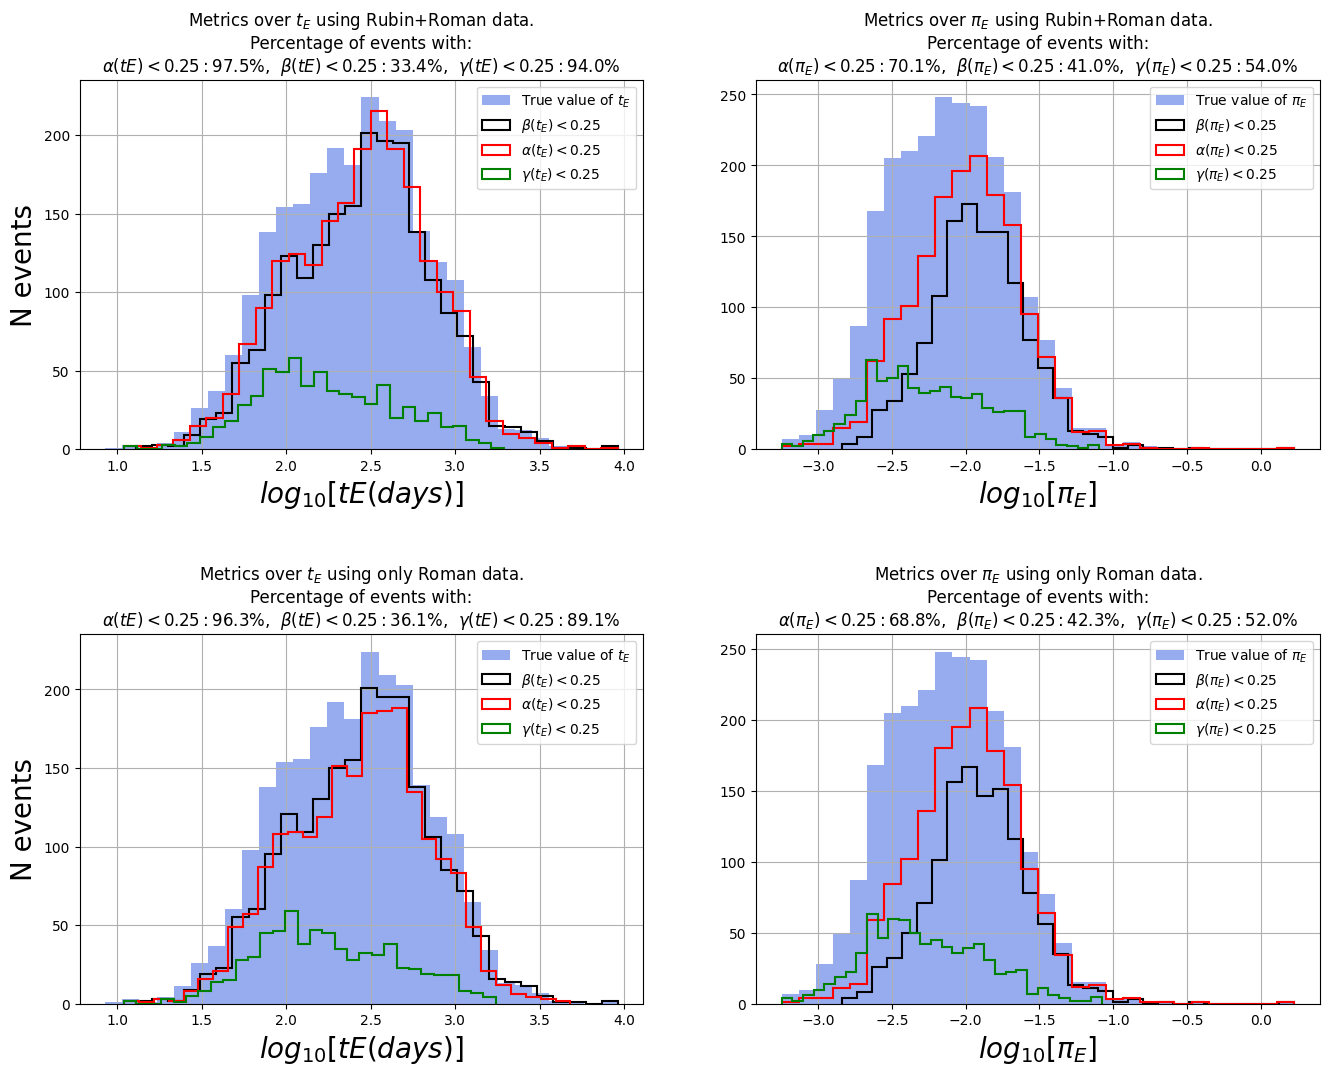

In [44]:
%matplotlib inline
plt.close('all')
# plt.figure(figsize=(8,6))
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.5, wspace=0.2)

mask = (true['categories']=='A')#&(true['categories']=='C')and(true['categories']=='D')
axes[0,0].hist(np.log10(true['te']),bins=30,color='royalblue',alpha=0.55,label=r'True value of $t_E$')
axes[0,0].hist(np.log10(true['te'][true['Source'].isin(true['Source'][met_3_rr['te']<0.25])][mask]),bins=30, histtype='step',color='k',lw=1.5,label=r'$\beta(t_E)<0.25$')
axes[0,0].hist(np.log10(true['te'][true['Source'].isin(true['Source'][met_1_rr['te']<0.25])][mask]),bins=30, histtype='step',color='r',lw=1.5,label=r'$\alpha(t_E)<0.25$')
axes[0,0].hist(np.log10(true['te'][true['Source'].isin(true['Source'][met_2_rr['te']<0.25])][mask]),bins=30, histtype='step',color='g',lw=1.5,label=r'$\gamma(t_E)<0.25$')
# plt.axvline(68.2,color='red')
# plt.yscale('log')
axes[0,0].set_xlabel(r'$log_{10}[tE(days)]$',fontsize=20)
axes[0,0].set_ylabel('N events',fontsize=20)
axes[0,0].grid(True)
# plt.show()
# plt.close('all')
# plt.figure(figsize=(8,6))
axes[0,1].hist(np.log10(true['piE']),bins=30,color='royalblue',alpha=0.55,label=r'True value of $\pi_E$')
axes[0,1].hist(np.log10(true['piE'][true['Source'].isin(true['Source'][met_3_rr['piE']<0.25])][mask]),bins=30, histtype='step',color='k',lw=1.5,label=r'$\beta(\pi_E)<0.25$')
axes[0,1].hist(np.log10(true['piE'][true['Source'].isin(true['Source'][met_1_rr['piE']<0.25])][mask]),bins=30, histtype='step',color='r',lw=1.5,label=r'$\alpha(\pi_E)<0.25$')
axes[0,1].hist(np.log10(true['piE'][true['Source'].isin(true['Source'][met_2_rr['piE']<0.25])][mask]),bins=30, histtype='step',color='g',lw=1.5,label=r'$\gamma(\pi_E)<0.25$')
# plt.axvline(68.2,color='red')
# plt.yscale('log')
axes[0,1].set_xlabel(r'$log_{10}[\pi_E]$',fontsize=20)
# axes[1].set_ylabel('N events',fontsize=20)
axes[0,1].grid(True)
axes[0,1].legend(loc='best')
axes[0,0].legend(loc='best')
# plt.suptitle('Roman and Rubin lightcurves',fontsize=18)
# plt.show()
# 
# plt.close('all')
# plt.figure(figsize=(8,6))
# fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[1,0].hist(np.log10(true['te']),bins=30,color='royalblue',alpha=0.55,label=r'True value of $t_E$')
axes[1,0].hist(np.log10(true['te'][true['Source'].isin(true['Source'][met_3_roman['te']<0.25])][mask]),bins=30, histtype='step',color='k',lw=1.5,label=r'$\beta(t_E)<0.25$')
axes[1,0].hist(np.log10(true['te'][true['Source'].isin(true['Source'][met_1_roman['te']<0.25])][mask]),bins=30, histtype='step',color='r',lw=1.5,label=r'$\alpha(t_E)<0.25$')
axes[1,0].hist(np.log10(true['te'][true['Source'].isin(true['Source'][met_2_roman['te']<0.25])][mask]),bins=30, histtype='step',color='g',lw=1.5,label=r'$\gamma(t_E)<0.25$')
# plt.axvline(68.2,color='red')
# plt.yscale('log')
axes[1,0].set_xlabel(r'$log_{10}[tE(days)]$',fontsize=20)
axes[1,0].set_ylabel('N events',fontsize=20)
axes[1,0].grid(True)
# plt.show()
# plt.close('all')
# plt.figure(figsize=(8,6))
axes[1,1].hist(np.log10(true['piE']),bins=30,color='royalblue',alpha=0.55,label=r'True value of $\pi_E$')
axes[1,1].hist(np.log10(true['piE'][true['Source'].isin(true['Source'][met_3_roman['piE']<0.25])][mask]),bins=30, histtype='step',color='k',lw=1.5,label=r'$\beta(\pi_E)<0.25$')
axes[1,1].hist(np.log10(true['piE'][true['Source'].isin(true['Source'][met_1_roman['piE']<0.25])][mask]),bins=30, histtype='step',color='r',lw=1.5,label=r'$\alpha(\pi_E)<0.25$')
axes[1,1].hist(np.log10(true['piE'][true['Source'].isin(true['Source'][met_2_roman['piE']<0.25])][mask]),bins=30, histtype='step',color='g',lw=1.5,label=r'$\gamma(\pi_E)<0.25$')
# plt.axvline(68.2,color='red')
# plt.yscale('log')
axes[1,1].set_xlabel(r'$log_{10}[\pi_E]$',fontsize=20)
# axes[1].set_ylabel('N events',fontsize=20)
axes[1,1].grid(True)
axes[1,1].legend(loc='best')
axes[1,0].legend(loc='best')
# plt.suptitle('Roman lightcurves',fontsize=18)
axes[1,0].set_title(r'Metrics over $t_E$ using only Roman data.'+'\nPercentage of events with:\n'+r"$\alpha(tE)<0.25:$"+f"{100*round(len(met_1_roman['te'][met_1_roman['te']<0.25])/len(true),3)}%"+r',  $\beta(tE)<0.25:$'+f"{100*round(len(met_2_roman['te'][met_2_roman['te']<0.25])/len(true),3)}%"+r',  $\gamma(tE)<0.25:$'+f"{100*round(len(met_3_roman['te'][met_3_roman['te']<0.25])/len(true),3)}%")
axes[1,1].set_title(r'Metrics over $\pi_E$ using only Roman data.'+'\nPercentage of events with:\n'+r"$\alpha(\pi_E)<0.25:$"+f"{100*round(len(met_1_roman['piE'][met_1_roman['piE']<0.25])/len(true),3)}%"+r',  $\beta(\pi_E)<0.25:$'+f"{100*round(len(met_2_roman['piE'][met_2_roman['piE']<0.25])/len(true),3)}%"+r',  $\gamma(\pi_E)<0.25:$'+f"{100*round(len(met_3_roman['piE'][met_3_roman['piE']<0.25])/len(true),2)}%")

axes[0,0].set_title(r'Metrics over $t_E$ using Rubin+Roman data.'+'\nPercentage of events with:\n'+r"$\alpha(tE)<0.25:$"+f"{100*round(len(met_1_rr['te'][met_1_rr['te']<0.25])/len(true),3)}%"+r',  $\beta(tE)<0.25:$'+f"{100*round(len(met_2_rr['te'][met_2_rr['te']<0.25])/len(true),3)}%"+r',  $\gamma(tE)<0.25:$'+f"{100*round(len(met_3_rr['te'][met_3_rr['te']<0.25])/len(true),3)}%")
axes[0,1].set_title(r'Metrics over $\pi_E$ using Rubin+Roman data.'+'\nPercentage of events with:\n'+r"$\alpha(\pi_E)<0.25:$"+f"{100*round(len(met_1_rr['piE'][met_1_rr['piE']<0.25])/len(true),3)}%"+r',  $\beta(\pi_E)<0.25:$'+f"{100*round(len(met_2_rr['piE'][met_2_rr['piE']<0.25])/len(true),2)}%"+r',  $\gamma(\pi_E)<0.25:$'+f"{100*round(len(met_3_rr['piE'][met_3_rr['piE']<0.25])/len(true),2)}%")

# axes[1,1].set_title('Metrics over $\pi_E$ using only Roman data in \nmicrolensing events asociated to black holes.')

# axes[0,0].set_title('Metrics over $t_E$ using Rubin+Roman data in \nmicrolensing events asociated to black holes.')
# axes[0,1].set_title('Metrics over $\pi_E$ using Rubin+Roman data in \nmicrolensing events asociated to black holes.')

plt.show()

68.19053925063963


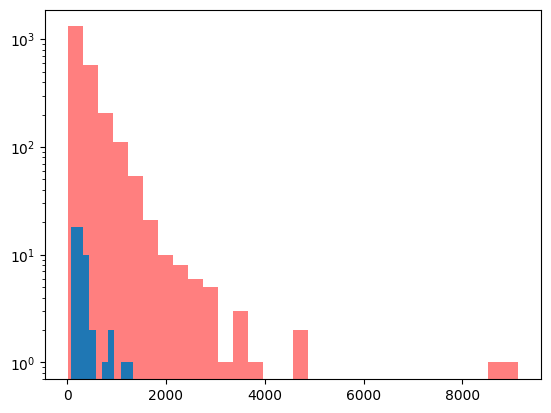

In [45]:
plt.close('all')
r = 'piE'
s1 = met_3_rr['Source'][met_3_rr[r]<0.25].values
s2 = met_3_roman['Source'][met_3_roman[r]<0.25].values
# print(len(s1),len(s2))
# print(len(set(s1).intersection(s2)))
s1s1 = set(s1).intersection(s2)
# print(len(s1s1))
#quiero los elementos de s2 que no estan en s1s2
s2nots1s2 = [s1[i] for i in range(len(s1)) if not s1[i] in s1s1]
plt.hist(true['te'][~true['Source'].isin(s2nots1s2)],bins=30,alpha=0.5,color='red')
plt.hist(true['te'][met_3_rr['Source'].isin(s2nots1s2)],bins=10)
plt.yscale('log')
print(min(true['te'][met_3_rr['Source'].isin(s2nots1s2)]))
# print(true[met_3_rr['Source'].isin(s2nots1s2)])
plt.show()

In [46]:
# true['categories'][met_3_rr['Source'].isin(s2nots1s2)]

In [47]:
def mag(zp, Flux):
    '''
    Transform the flux to magnitude
    inputs
    zp: zero point
    Flux: vector that contains the lightcurve flux
    '''
    return zp - 2.5 * np.log10(abs(Flux))
ZP = {'W149': 27.615, 'u': 27.03, 'g': 28.38, 'r': 28.16,
          'i': 27.85, 'z': 27.46, 'y': 26.68}

In [48]:
max(true['piE'])

1.6810535878644048

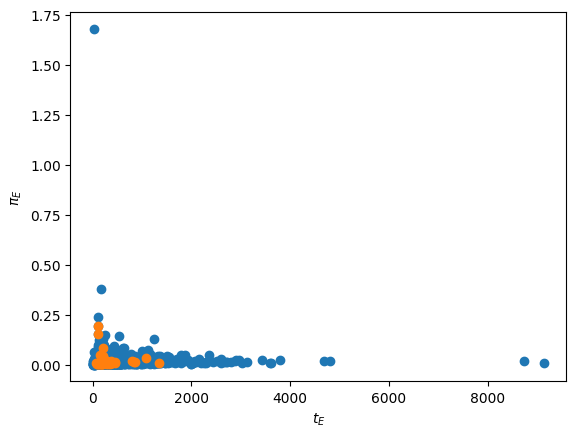

In [49]:
plt.close('all')
pass_m3_piE=[]
pass_m3_tE=[]
for j in range(len(s2nots1s2)):
    nsource = s2nots1s2[j]
    nset = int(nsource/5000)
    nevent = nsource - 5000*nset
    nevent
    path_event = f'/home/anibal/results_roman_rubin/BH_final/BH/set_sim{nset}/Event_{nevent}.h5'
    data_event, params, bands = read_data(path_event)
    pass_m3_piE.append(np.sqrt(params['piEE']**2+params['piEN']**2))
    pass_m3_tE.append(params['tE'])

plt.xlabel(r'$t_E$')
plt.ylabel(r'$\pi_E$')
plt.plot(true['te'],true['piE'],marker='o',ls='')
plt.plot(pass_m3_tE,pass_m3_piE,marker='o',ls='')
plt.show()

671     10633
1218    15197
1506    17605
2322    24613
2345    24789
Name: Source, dtype: object
671     B
1218    B
1506    A
2322    A
2345    A
Name: categories, dtype: object


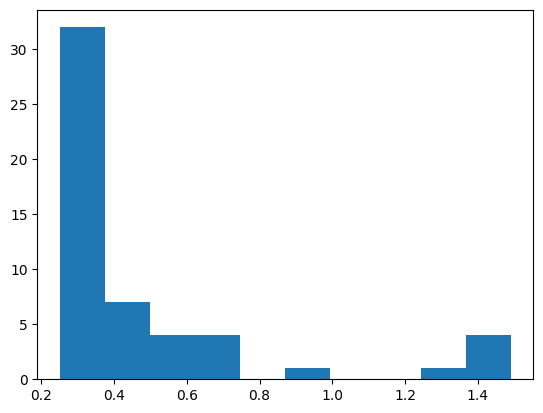

In [50]:
plt.close('all')
new_df = met_3_roman[met_3_roman['Source'].isin(s2nots1s2)]
plt.hist(new_df['piE'])
print(new_df['Source'][new_df['piE']>1])
print(true['categories'][true['Source'].isin(new_df['Source'][new_df['piE']>1])])
plt.show()

In [51]:
met_3_rr['Source'][met_3_rr['piE']>10]

11       5126
23       5202
45       5365
47       5396
50       5427
        ...  
2364    24897
2369    24927
2371    24960
2373    24965
2376    24992
Name: Source, Length: 261, dtype: object

In [52]:
print(met_3_rr[met_3_rr['Source']==24789])
print(met_3_roman[met_3_roman['Source']==24789])

     Source            t0        u0        te      piEN     piEE       piE
2345  24789  5.999103e-08 -0.062801  0.013623  2.939325 -0.07282  0.116313
     Source            t0        u0       te      piEN      piEE       piE
2345  24789  3.348442e-07 -2.429129  0.17476  6.186016 -0.172896  1.472878


In [127]:
def SNR(flux_bl, flux, err_flux):
    '''
    mag_bl(float): the magnitude of the baseline obtained from the true value of the simulation
    mag(array): array containing the magnitude points of the lightcurve
    err_mag(array): array with the uncertainties of the magnitude
    '''
    snr = []
    for i in range(len(flux)):
        if abs(flux[i]-3*err_flux[i])>flux_bl:
            snr.append((flux[i]-flux_bl)/err_flux[i])
    return sum(snr)

In [128]:
def find_overlaps(a, b):
    overlaps = []
    
    # Iterate over each interval in list a
    for interval_a in a:
        # Iterate over each interval in list b
        for interval_b in b:
            # Find the maximum start and minimum end between the intervals
            start = max(interval_a[0], interval_b[0])
            end = min(interval_a[1], interval_b[1])
            
            # If start is less than or equal to end, we have an overlap
            if start <= end:
                overlaps.append((start, end))
    
    return overlaps


# result = find_overlaps(roman_interval, rubin_interval)
# print(result[0])  # Output: [(3, 3), (9, 9)]


In [129]:
def find_consecutive_ranges(values, gap=100):
    # Sort the values to ensure they are in ascending order
    values.sort()

    # Initialize variables to store the results and a temporary range
    ranges = []
    start = values[0]
    
    for i in range(1, len(values)):
        # Check if the current value is not consecutive with the previous one
        if values[i] - values[i-1] > gap:
            # Store the start and end of the current range
            ranges.append((start, values[i-1]))
            # Start a new range
            start = values[i]
    
    # Append the final range
    ranges.append((start, values[-1]))

    return ranges

# Example usage:
values = [10, 11, 15, 16, 117, 118, 120, 240, 245, 500, 510, 1000]
result = find_consecutive_ranges(values, gap=100)
print(result)  # Output: [(10, 16), (117, 120), (240, 245), (500, 510), (1000, 1000)]


[(10, 16), (117, 120), (240, 245), (500, 510), (1000, 1000)]


tE =51.1204
$\pi_E=$ 0.001305
u0 = 0.698
m3_RR: 164.8393
m3_Roman: 2599.6151

Fraccion de cobertura de Rubin 0.6559915957476815
Fraccion de cobertura de Roman 0
Fraccion de cobertura total 0.6559915957476815
Number of points =  19
[18.9338, 19.497, 18.517, 18.369, 18.384, 18.44, 18.463]
SNR =  6852.330739607423
Signal-to-Noise Ratio (SNR): 2164.1295058722444


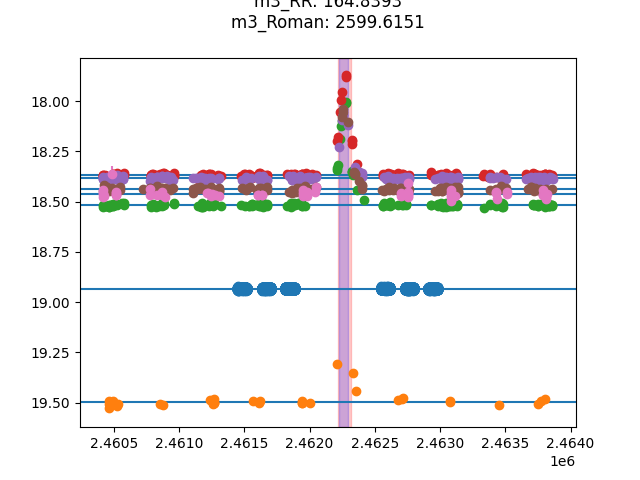

In [130]:
%matplotlib widget
plt.close('all')
# nsource = true['Source'][~true['Source'].isin(s2nots1s2)].iloc[80]
nsource = 5126#24789#s2nots1s2[10]
# nsource = met_3_rr['Source'][met_3_rr['piE']>1].iloc[6]
# print(nsource)
# print(met_3_rr[met_3_rr['Source']==nsource])
# print(met_3_roman[met_3_roman['Source']==nsource])
nset = int(nsource/5000)
nevent = nsource - 5000*nset
nevent

path_event = f'/home/anibal/results_roman_rubin/BH_final/BH/set_sim{nset}/Event_{nevent}.h5'
data_event, params, bands = read_data(path_event)
# print(np.sqrt(params['piEE']**2+params['piEN']**2))

i=0
for b in bands:
    if not len(bands[b]) ==0:
        plt.errorbar(bands[b]['time'], bands[b]['mag'],bands[b]['err_mag'],marker='o',ls='')
        plt.axhline(mag(ZP[b], params['ftotal_'+b]))
        i+=1

plt.title('tE ='+str(round(params['tE'],4))+'\n'+r'$\pi_E=$ '+
          str(round(np.sqrt(params['piEE']**2+params['piEN']**2),6))+
         f"\nm3_RR: {round(met_3_rr['piE'][met_3_rr['Source']==nsource].values[0],4)}"+
         f"\nm3_Roman: {round(met_3_roman['piE'][met_3_roman['Source']==nsource].values[0],4)}\n")

print(('tE ='+str(round(params['tE'],4))+'\n'+r'$\pi_E=$ '+
          str(round(np.sqrt(params['piEE']**2+params['piEN']**2),6))+
         '\nu0 = '+str(round(params['u0'],3))+
         f"\nm3_RR: {round(met_3_rr['piE'][met_3_rr['Source']==nsource].values[0],4)}"+
         f"\nm3_Roman: {round(met_3_roman['piE'][met_3_roman['Source']==nsource].values[0],4)}\n"))

plt.axvspan(params['t0']-params['tE'],params['t0']+params['tE'],color='red',alpha=0.2)
if True:
    try:
        roman_deltat = []
        roman_interval = find_consecutive_ranges(bands['W149']['time'].value[(params['t0']-params['tE']<bands['W149']['time'].value)&(params['t0']+params['tE']>bands['W149']['time'].value)])
        for i in range(len(roman_interval)):
            plt.axvspan(roman_interval[i][0],roman_interval[i][1],color='green',alpha=0.2)
            roman_deltat.append(abs(roman_interval[i][0]-roman_interval[i][1]))
        roman_fracT = sum(roman_deltat)/(2*params['tE'])
    except:
        roman_fracT=0
        
    rubin_ts = []
    rubin_deltat = []
    for u in 'ugrizy':
        rubin_ts+=list(bands[u]['time'].value)
    rubin_ts_array = np.array(rubin_ts)
    rubin_ts_array_event = rubin_ts_array[(params['t0']-params['tE']<rubin_ts_array)&(params['t0']+params['tE']>rubin_ts_array)] 
    rubin_interval = find_consecutive_ranges(rubin_ts_array_event)
    # print(len())
    for i in range(len(rubin_interval)):
        plt.axvspan(rubin_interval[i][0],rubin_interval[i][1],color='blue',alpha=0.2)
        rubin_deltat.append(abs(rubin_interval[i][0]-rubin_interval[i][1]))
    rubin_fracT = sum(rubin_deltat)/(2*params['tE'])

    if roman_fracT==0:
        overlap_fracT=0
    else: 
        overlaps = find_overlaps(roman_interval, rubin_interval)
        overlap_times = []
        for o in overlaps:
            plt.axvspan(o[0], o[1],color='yellow',alpha=0.2)
            overlap_times.append(abs(o[0]- o[1]))
        overlap_fracT = sum(overlap_times)/(2*params['tE'])

    print('Fraccion de cobertura de Rubin',rubin_fracT)
    print('Fraccion de cobertura de Roman',roman_fracT)
    print('Fraccion de cobertura total',rubin_fracT+roman_fracT-overlap_fracT)
# coverage_time.append(rubin_fracT+roman_fracT-overlap_fracT)
Npts = []
for b in bands:
    if not len(bands[b]) ==0:
        for k in range(len(bands[b]['time'])):
            if params['t0']-params['tE']<bands[b]['time'][k]<params['t0']+params['tE']:
                Npts.append(1)
            # print(bands[b]['time'], bands[b]['mag'],bands[b]['err_mag'],marker='o',ls='')

print('Number of points = ',len(Npts))
print([mag(ZP[f],params['ftotal_'+f]) for f in ('W149','u','g','r','i','z','y')])
f = 'g'
# print(len(10**((ZP[f]-bands[f]['mag'])/2.5)))
# print(len(abs(10**((ZP[b]-bands[b]['mag'])/2.5)*bands[b]['err_mag']/2.5)))
print('SNR = ',SNR(params['ftotal_'+f], 10**((ZP[f]-bands[f]['mag'])/2.5), abs(10**((ZP[b]-bands[f]['mag'])/2.5)*bands[f]['err_mag']/2.5)))


mean_signal = np.mean(10**((ZP[f]-bands[f]['mag'])/2.5))
noise = np.sqrt(np.mean(abs(10**((ZP[b]-bands[f]['mag'])/2.5)*bands[f]['err_mag']/2.5)**2))
snr = mean_signal / noise

print(f'Signal-to-Noise Ratio (SNR): {snr}')

plt.gca().invert_yaxis()
plt.show()

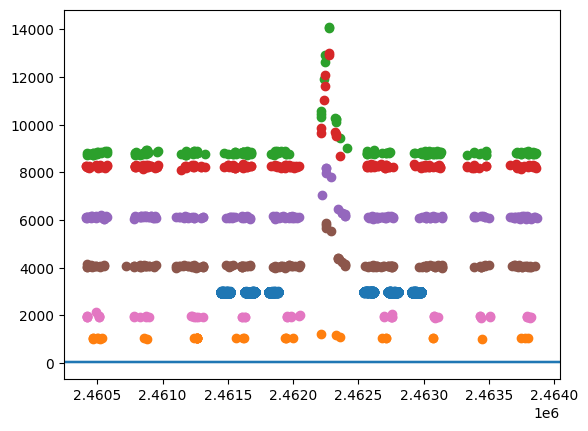

In [145]:
plt.close('all')
for b in bands:
    if not len(bands[b]) ==0:
        plt.errorbar(bands[b]['time'],10**((ZP[b]-bands[b]['mag'])/2.5), abs(10**((ZP[b]-bands[b]['mag'])/2.5)*bands[b]['err_mag']/2.5),marker='o',ls='')
        plt.axhline(mag(ZP[b], params['ftotal_'+b]))
        i+=1
plt.show()

In [133]:
# print(min(bands['W149']['time'].value[(params['t0']-params['tE']<bands['W149']['time'].value)&(params['t0']+params['tE']>bands['W149']['time'].value)]))
# print(max(bands['W149']['time'].value[(params['t0']-params['tE']<bands['W149']['time'].value)&(params['t0']+params['tE']>bands['W149']['time'].value)]))

In [ ]:
# for j in range(len(band[b]):
#     if params['t0']-params['tE']<band[b]['time'][j]<params['t0']+params['tE']:
#         deltaT = 2*params['tE']

In [134]:
print(len(met_1_rr['Source'][met_1_rr['piE']<0.25]))
print(len(met_1_roman['Source'][met_1_roman['piE']<0.25]))

1667
1635


In [135]:
plt.hist(met_1_rr['piE'][met_1_rr['Source'].isin(s2nots1s2)])
plt.hist(met_1_roman['piE'][met_1_roman['Source'].isin(s2nots1s2)])

(array([17.,  3.,  9., 10.,  5.,  1.,  1.,  3.,  1.,  3.]),
 array([0.00160621, 0.05132955, 0.10105289, 0.15077623, 0.20049956,
        0.2502229 , 0.29994624, 0.34966958, 0.39939292, 0.44911626,
        0.4988396 ]),
 <BarContainer object of 10 artists>)

# mass estimation

$\theta_E\pi_E=\pi_{rel}$
$$M=\frac{\theta_E}{\kappa\pi_{E}}=\frac{\theta_E}{\kappa\sqrt{\pi_{EE}^2+\pi_{EN}^2}} $$

$$\frac{\partial M}{\partial \theta_E}=\frac{1}{\kappa\sqrt{\pi_{EE}^2+\pi_{EN}^2}}=\frac{1}{\kappa\pi_{E}} $$
$$\frac{\partial M}{\partial \pi_{EE}}=-\frac{\theta_E \pi_{EE}}{\kappa[\pi_{EE}^2+\pi_{EN}^2]^{3/2}}=-\frac{\theta_E \pi_{EE}}{\kappa\pi_{E}^{3}} $$
$$\frac{\partial M}{\partial \pi_{EN}}=-\frac{\theta_E\pi_{EN}}{\kappa[\pi_{EE}^2+\pi_{EN}^2]^{3/2}} =-\frac{\theta_E \pi_{EN}}{\kappa\pi_{E}^{3}}$$


$$\sigma_M^2 = \left(\frac{\partial M}{\partial \theta_E} \sigma_{\theta_{E}}\right)^2 + \left(\frac{\partial M}{\partial \pi_{EE}} \sigma_{\pi_{EE}}\right)^2+ \left(\frac{\partial M}{\partial \pi_{EN}} \sigma_{\pi_{EN}}\right)^2 + 2\frac{\partial M}{\partial \pi_{EE}}\frac{\partial M}{\partial \pi_{EN}} cov(\pi_{EN},\pi_{EE})+ \frac{\partial M}{\partial \pi_{EE}}\frac{\partial M}{\partial \theta_E}cov(\pi_{EE},\theta_{E})+ \frac{\partial M}{\partial \pi_{EN}}\frac{\partial M}{\partial \theta_E}cov(\pi_{EN},\theta_{E})$$
if we consider $cov(\theta_E,\pi_{EE})=0$ , $cov(\theta_E,\pi_{EN})=0$
$$\sigma_M^2 = \left(\frac{\partial M}{\partial \theta_E} \sigma_{\theta_{E}}\right)^2 + \left(\frac{\partial M}{\partial \pi_{EE}} \sigma_{\pi_{EE}}\right)^2+ \left(\frac{\partial M}{\partial \pi_{EN}} \sigma_{\pi_{EN}}\right)^2 + 2\frac{\partial M}{\partial \pi_{EE}}\frac{\partial M}{\partial \pi_{EN}} cov(\pi_{EN},\pi_{EE})$$

$$\sigma_M^2 = \left(\frac{\theta_E}{\kappa\pi_{E}} 0.1\right)^2 + \left(\frac{\theta_E \pi_{EE}}{\kappa\pi_{E}^{3}} \sigma_{\pi_{EE}}\right)^2+ \left(\frac{\theta_E \pi_{EN}}{\kappa\pi_{E}^{3}} \sigma_{\pi_{EN}}\right)^2 + 2\frac{\theta_E \pi_{EE}}{\kappa\pi_{E}^{3}}\frac{\theta_E \pi_{EN}}{\kappa\pi_{E}^{3}} cov(\pi_{EN},\pi_{EE})$$

$$\sigma_M^2 = M^2\left[\left( 0.1\right)^2 + \left(\frac{ \pi_{EE}}{\pi_{E}^{2}} \sigma_{\pi_{EE}}\right)^2+ \left(\frac{ \pi_{EN}}{\pi_{E}^{2}} \sigma_{\pi_{EN}}\right)^2 + 2\frac{ \pi_{EE}}{\pi_{E}^{2}}\frac{ \pi_{EN}}{\pi_{E}^{2}} cov(\pi_{EN},\pi_{EE})\right]$$

$$\sigma_M = M\sqrt{\left[\left( 0.1\right)^2 + \left(\frac{ \pi_{EE}}{\pi_{E}^{2}} \sigma_{\pi_{EE}}\right)^2+ \left(\frac{ \pi_{EN}}{\pi_{E}^{2}} \sigma_{\pi_{EN}}\right)^2 + 2\frac{ \pi_{EE}}{\pi_{E}^{2}}\frac{ \pi_{EN}}{\pi_{E}^{2}} cov(\pi_{EN},\pi_{EE})\right]}$$


In [137]:
from astropy import units as u
# Define constants
aconv = (180 * 60 * 60 * 1000) / math.pi
c = const.c
G = const.G
k = 4 * G / (c ** 2)
# Initialize lists to store results
err_rel_M = []
M_fit_list_rr = []
M_fit_list_roman = []
M_true_list = []
error_m_rr = []
error_m_roman = []

def calculate_mass_and_error(fit_params, thetaE):
    piE_fit = fit_params['piE'].values[0] * (1 / u.kpc)
    
    piEE_fit = fit_params['piEE'].values[0] * (1 / u.kpc)
    piEN_fit = fit_params['piEN'].values[0] * (1 / u.kpc)

    sigma_piee = fit_params['piEE_err'].values[0] * (1 / u.kpc)
    sigma_pien = fit_params['piEN_err'].values[0] * (1 / u.kpc)

    # Calculate the fitted mass
    M_fit = ((thetaE / aconv**2) / (k * piE_fit)).decompose().to('M_sun')
    # Derivatives for error propagation
    dm_dpiee = ((thetaE * (-piEE_fit) / aconv**2) / (k * piE_fit**3)).decompose()
    dm_dpien = ((thetaE * (-piEN_fit) / aconv**2) / (k * piE_fit**3)).decompose()
    dm_dthetaE = ((1  / aconv**2) / (k * piE_fit)).decompose()
    # Quadratic terms for the error
    cuad_terms =  (dm_dpiee * sigma_piee)**2 + (dm_dpien * sigma_pien)**2 + (dm_dthetaE * 0.1 * thetaE)**2
    # Covariance terms for the error
    cov_terms = 2*dm_dpiee * dm_dpien * fit_params['cov_piEE_piEN'].values[0] * (1 / u.kpc)**2
    # print(cuad_terms, cov_terms)
    # Total error in mass
    sigma_m = cuad_terms + cov_terms
    # print(np.sqrt(sigma_m).to('M_sun').value/M_fit.value)
    # print(M_fit.value, np.sqrt(sigma_m).to('M_sun').value)
    return M_fit.value, np.sqrt(sigma_m).to('M_sun').value

# Loop through each event in met_3_rr

for i in tqdm(range(len(met_3_rr.values))):
    event_good_metric = met_3_rr['Source'].iloc[i]
    # Determine the file and row index for the event
    nset = int(event_good_metric / 5000)
    # print(nset)
    nsource = int(event_good_metric - nset * 5000)
    # Read the TRILEGAL parameters for the event
    trilegal_params = pd.read_csv(f'/home/anibal/results_roman_rubin/BH_split_{nset}.csv').iloc[nsource]
    # Extract necessary parameters
    Rstar = trilegal_params['radius'] * u.R_sun
    DS = trilegal_params['D_S'] * u.pc
    DL = trilegal_params['D_L'] * u.pc
    pi_rel = ((1 / DL) - (1 / DS))
    theta_s = np.arctan(Rstar / DS).decompose().to('mas').value
    thetaE = theta_s / trilegal_params['rho']
    piEE = trilegal_params['piEE']
    piEN = trilegal_params['piEN']
    piE = np.sqrt(piEE**2 + piEN**2) * (1 / u.kpc)
    # Calculate the true mass
    M_true = ((thetaE / aconv**2) / (k * piE)).decompose().to('M_sun')
    # Append true mass to the list
    M_true_list.append(M_true.value)
    
    # Calculate mass and error for Rubin
    M_fit_rr, sigma_m_rr = calculate_mass_and_error(fit_rr[fit_rr['Source']==event_good_metric], thetaE)
    M_fit_list_rr.append(M_fit_rr)
    error_m_rr.append(sigma_m_rr)
    
    # Calculate mass and error for Roman
    M_fit_roman, sigma_m_roman = calculate_mass_and_error(fit_roman[fit_roman['Source']==event_good_metric], thetaE)
    M_fit_list_roman.append(M_fit_roman)
    error_m_roman.append(sigma_m_roman)

  0%|          | 0/2377 [00:00<?, ?it/s]

para hallar la masa del planeta usamos $q=\frac{M_p}{M_s}$ y la masa total que derivamos aca $M_T=M_p+M_s$ $$M_p =\frac{ M_T q}{q+1}$$

In [ ]:
# 933-415

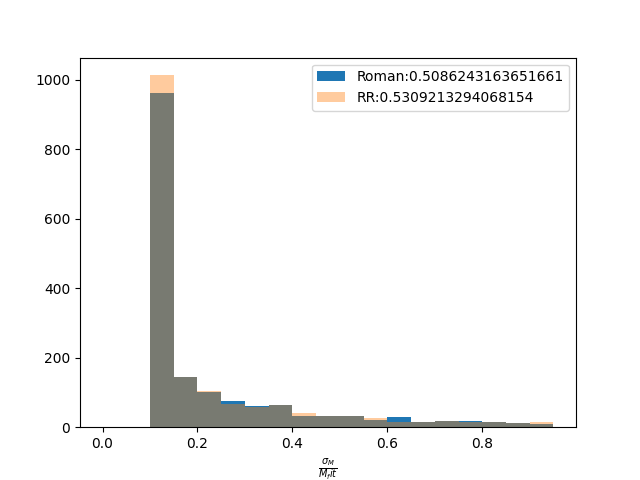

In [142]:
plt.close("all")
err_rel_roman = np.array(error_m_roman)/ np.array(M_fit_list_roman)
err_rel_rr = np.array(error_m_rr)/ np.array(M_fit_list_rr)
# print(min(err_rel_roman),min(err_rel_rr))
plt.hist(err_rel_roman,bins=np.arange(0,1,0.05),label='Roman:'+f'{len(err_rel_roman[err_rel_roman<0.25])/len(err_rel_roman)}')
plt.hist(err_rel_rr,bins=np.arange(0,1,0.05),label='RR:'+f'{len(err_rel_rr[err_rel_rr<0.25])/len(err_rel_rr)}',alpha=0.4)

plt.xlabel(r'$\frac{\sigma_M}{M_fit}$')
# plt.ylabel(r'$M_{fit}$')
plt.legend(loc='best')
plt.show()

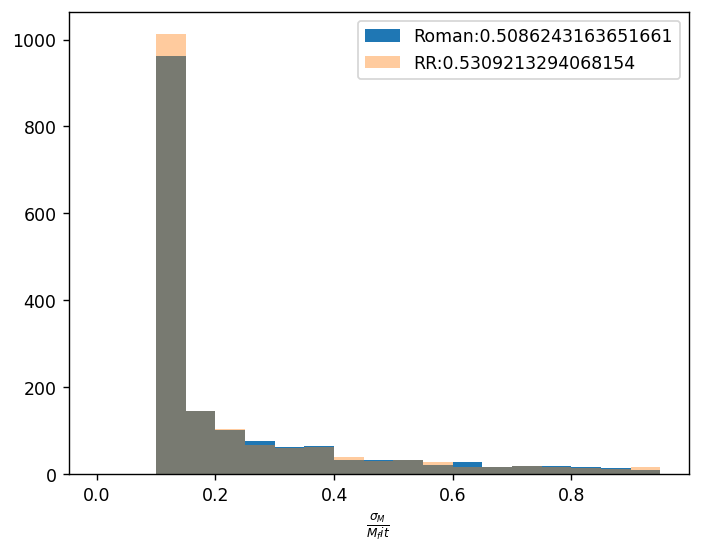

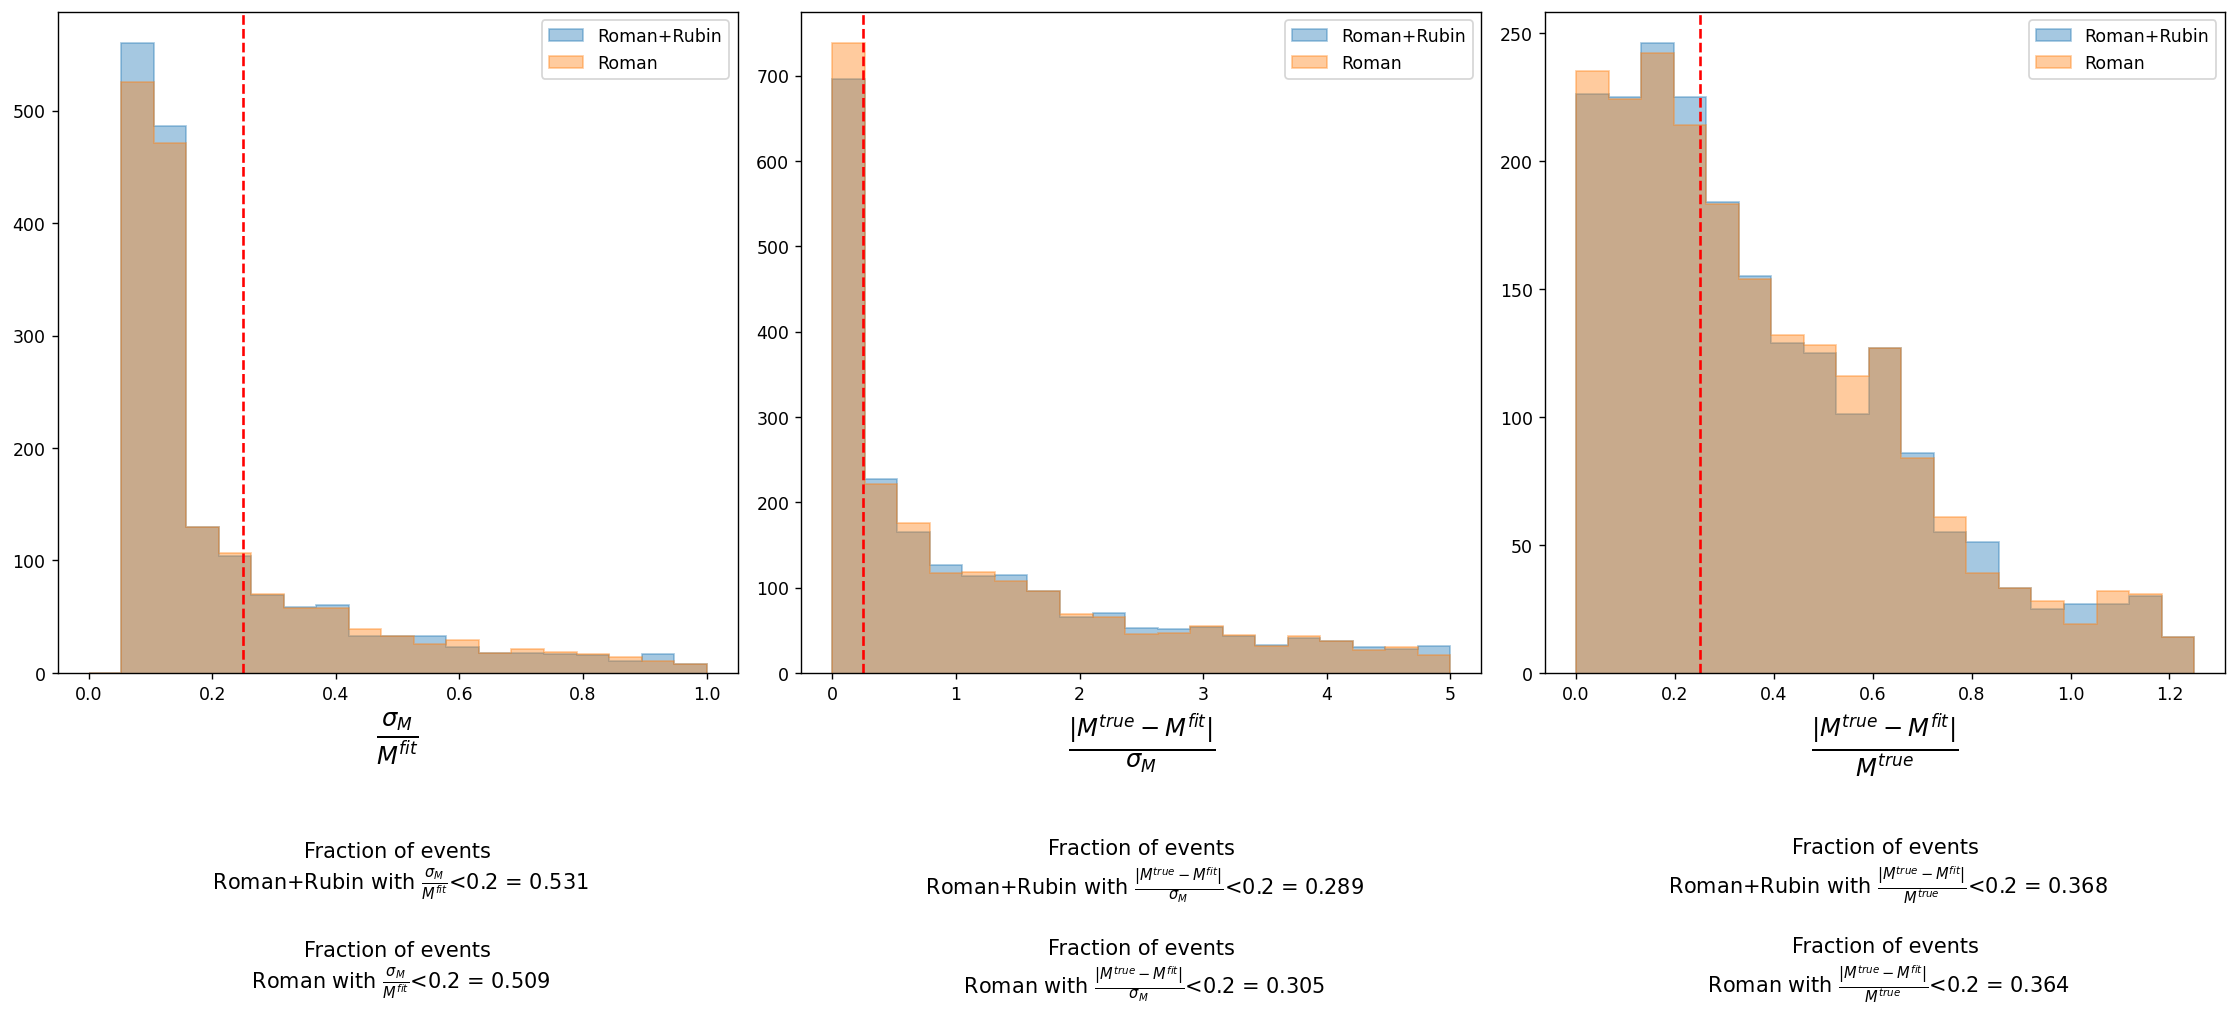

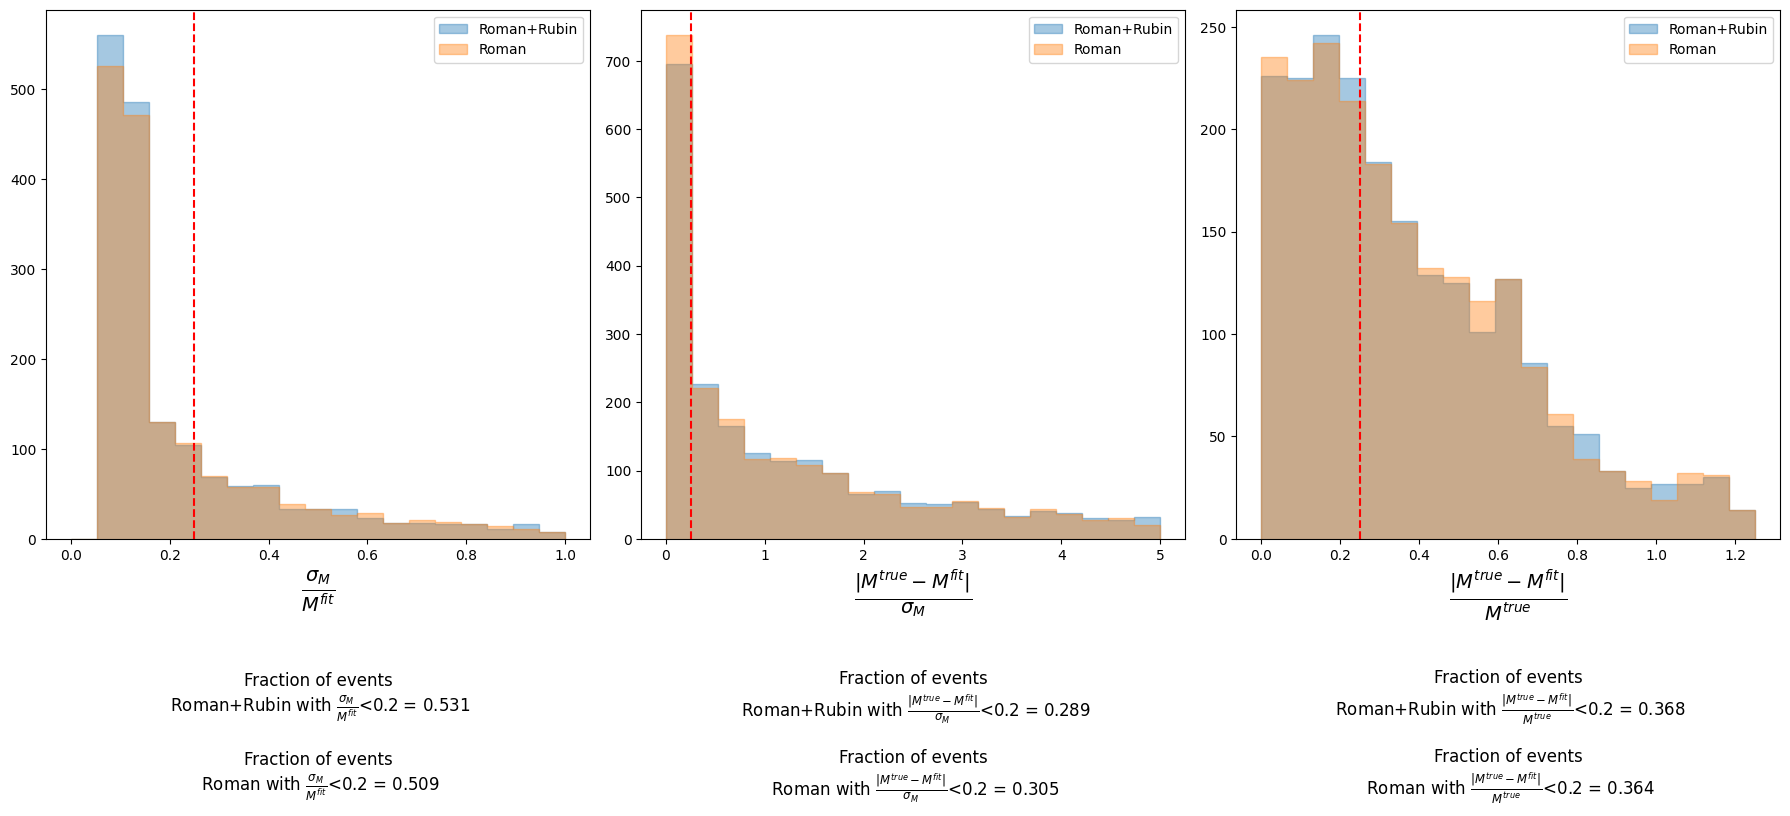

In [144]:
# Define labels
%matplotlib inline
label_mass_m3 = r'$\frac{\sigma_{M}}{M^{fit}}$'
label_mass_m2 = r'$\frac{|M^{true}-M^{fit}|}{\sigma_{M}}$'
label_mass_m1 = r'$\frac{|M^{true}-M^{fit}|}{M^{true}}$'

# Function to plot histograms
def plot_histogram(ax, data_roman, data_rr, min_bin, max_bin, bin_count, xlabel, label_position, label_fraction):
    bins = np.linspace(min_bin, max_bin, bin_count)
    ax.hist(data_rr, bins=bins, fill=True, alpha=0.4, histtype='step', label='Roman+Rubin')
    ax.hist(data_roman, bins=bins, fill=True, alpha=0.4, histtype='step', label='Roman')
    ax.set_xlabel(xlabel, fontsize=20)
    ax.axvline(0.25, color='red', linestyle='--')
    ax.legend(loc='best')
    ax.annotate(f'Fraction of events\n Roman+Rubin with {xlabel}<0.2 = {len(data_rr[data_rr < 0.25]) / len(data_rr):.3f}', 
                xy=(0.5, label_position), xycoords='axes fraction',
                ha='center', va='center', fontsize=12)
    ax.annotate(f'Fraction of events\n Roman with {xlabel}<0.2 = {len(data_roman[data_roman < 0.25]) / len(data_roman):.3f}', 
                xy=(0.5, label_position-0.15), xycoords='axes fraction',
                ha='center', va='center', fontsize=12)

# Generate data for plotting
mass_m3_roman = np.array(error_m_roman) / np.abs(np.array(M_fit_list_roman))
mass_m3_rr = np.array(error_m_rr) / np.abs(np.array(M_fit_list_rr))
mass_m2_roman = np.abs(np.array(M_true_list) - np.array(M_fit_list_roman)) / np.array(error_m_roman)
mass_m2_rr = np.abs(np.array(M_true_list) - np.array(M_fit_list_rr)) / np.array(error_m_rr)
mass_m1_roman = np.abs(np.array(M_true_list) - np.array(M_fit_list_roman)) / np.array(M_true_list)
mass_m1_rr = np.abs(np.array(M_true_list) - np.array(M_fit_list_rr)) / np.array(M_true_list)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 9))

# # Plot histograms
plot_histogram(axes[0], mass_m3_roman, mass_m3_rr, 0, 1, 20, label_mass_m3, -0.3, '<0.1')
plot_histogram(axes[1], mass_m2_roman, mass_m2_rr, 0, 5, 20, label_mass_m2, -0.3, '<0.1')
plot_histogram(axes[2], mass_m1_roman, mass_m1_rr, 0, 1.25, 20, label_mass_m1, -0.3, '<0.1')

# # Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

# plt.hist(mass_m3_rr)
# plt.hist(mass_m3_roman)

In [ ]:
path

In [ ]:
true

In [ ]:
pyLIMA_plots.plot_lightcurve(model, params)